In [1]:
import os
import numpy as np
from torch.utils.data import DataLoader
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
from load_data import load_masks, DatasetMask, split_train_val_test
from unet import UNet
from config import *
import torch.optim as optim
import wandb
from torchsummary import summary
from tiger.torch import SigmoidDiceLoss

In [2]:
# declare device for training
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
unet = UNet(in_channels=4).to(device)
summary(unet.to(device), input_size=(4, *patch_size), batch_size=8)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv3d-1        [8, 64, 64, 64, 64]           6,976
         LeakyReLU-2        [8, 64, 64, 64, 64]               0
            Conv3d-3        [8, 64, 64, 64, 64]         110,656
         LeakyReLU-4        [8, 64, 64, 64, 64]               0
        DoubleConv-5        [8, 64, 64, 64, 64]               0
         MaxPool3d-6        [8, 64, 32, 32, 32]               0
         DownBlock-7        [8, 64, 32, 32, 32]               0
            Conv3d-8       [8, 128, 32, 32, 32]         221,312
         LeakyReLU-9       [8, 128, 32, 32, 32]               0
           Conv3d-10       [8, 128, 32, 32, 32]         442,496
        LeakyReLU-11       [8, 128, 32, 32, 32]               0
       DoubleConv-12       [8, 128, 32, 32, 32]               0
        MaxPool3d-13       [8, 128, 16, 16, 16]               0
        DownBlock-14       [8, 128, 16,

In [3]:
masks, scores = load_masks(verse2019_dir, cases=2)
train_set, val_set, _ = split_train_val_test(masks, scores, patch_size)
train_loader = DataLoader(train_set, batch_size=8, shuffle=False)
val_loader = DataLoader(val_set, batch_size=8, shuffle=False)

Loading masks from /mnt/netcache/bodyct/experiments/vertebra_fracture_detection_t9560/datasets/verse2019/masks_bodies...
Available cases: 2 
train: 1, val: 0, test: 1
Extracting patches...
train: 4, val: 0, test: 1


Loss: 0.7158455848693848


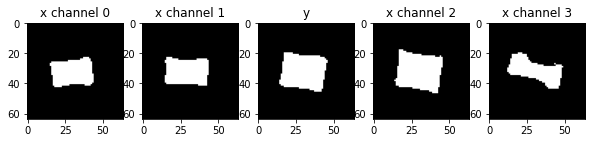

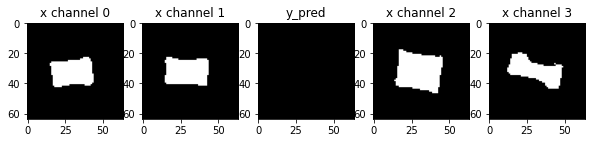

Loss: 0.7144187688827515


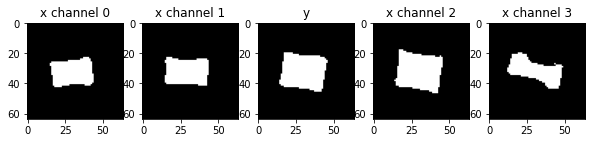

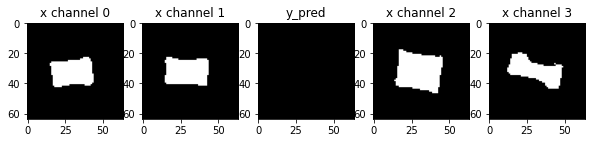

Loss: 0.713394820690155


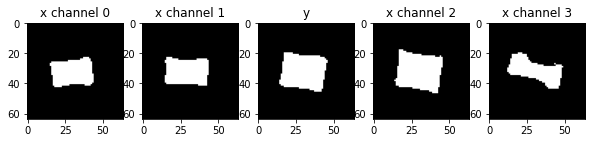

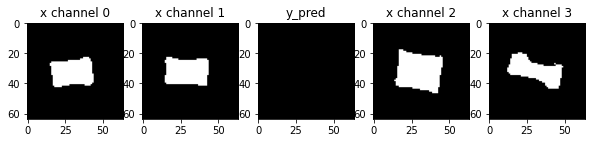

Loss: 0.7130255103111267


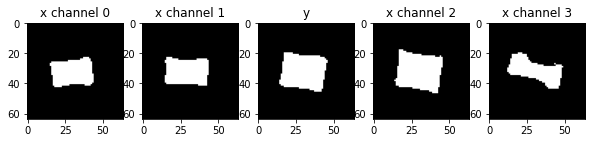

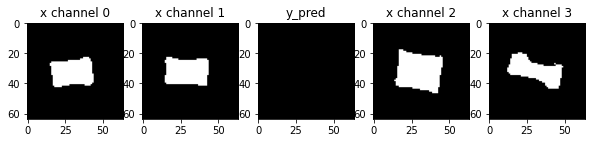

Loss: 0.7126307487487793


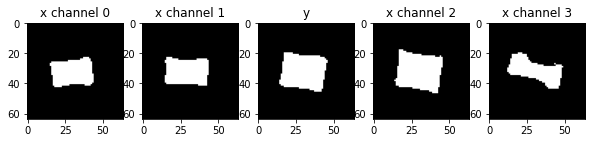

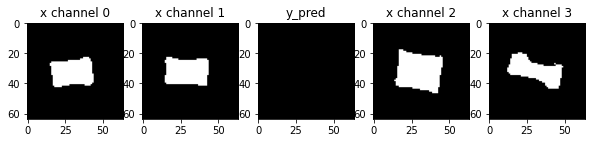

Loss: 0.7121318578720093


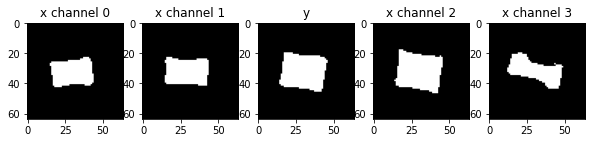

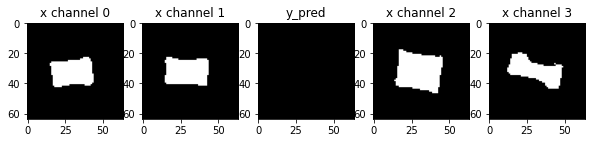

Loss: 0.7113866209983826


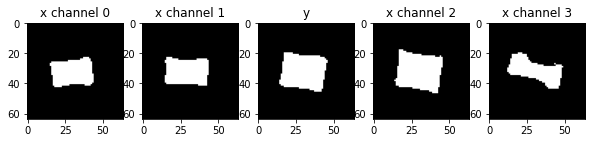

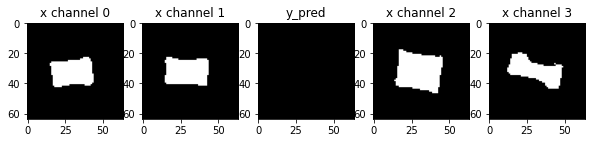

Loss: 0.7100546956062317


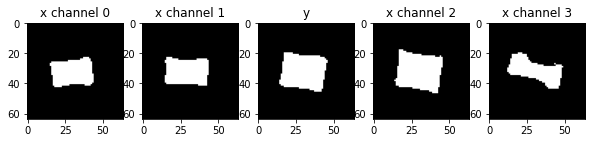

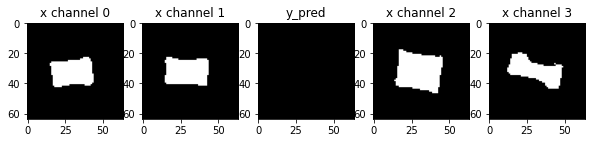

Loss: 0.7070878744125366


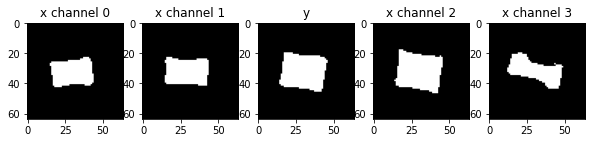

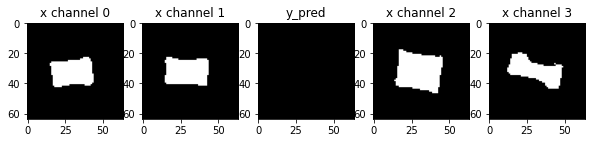

Loss: 0.6984391808509827


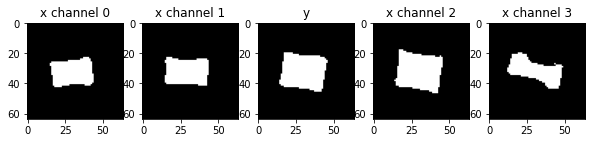

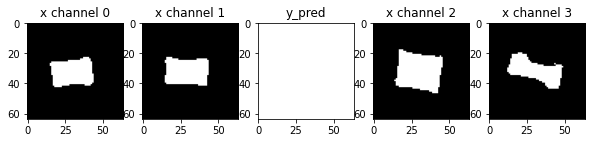

Loss: 0.6811226606369019


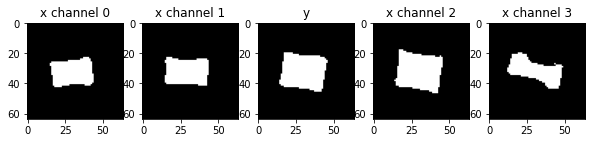

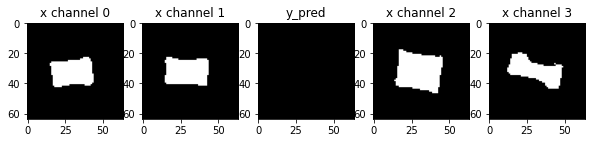

Loss: 0.4441208839416504


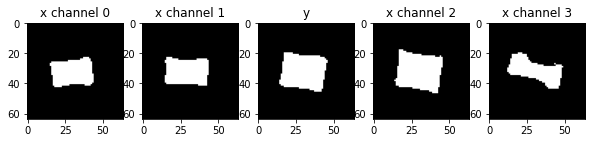

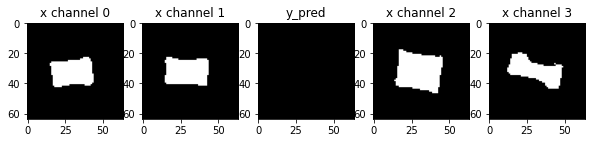

Loss: 3.4745934009552


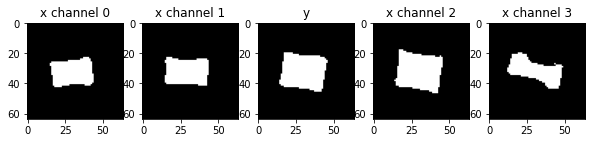

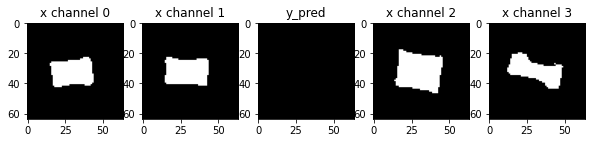

Loss: 0.41490864753723145


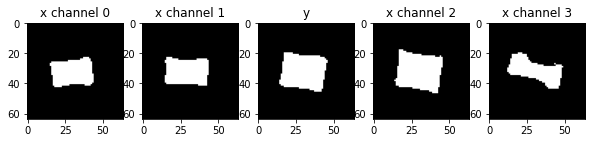

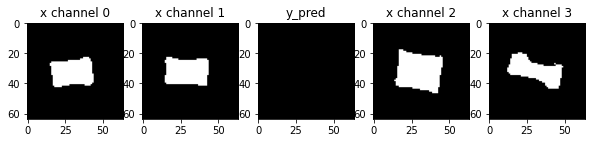

Loss: 0.6400610208511353


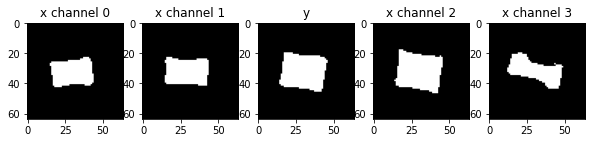

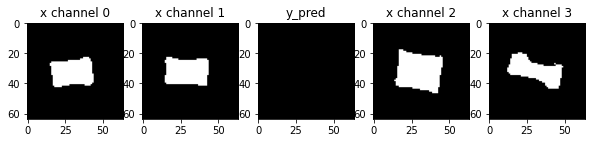

Loss: 0.6844378709793091


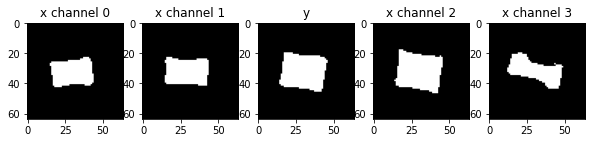

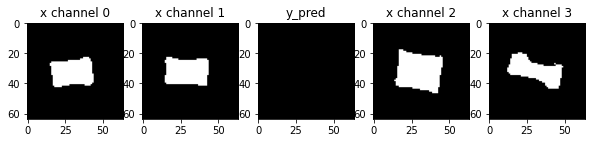

Loss: 0.6911357641220093


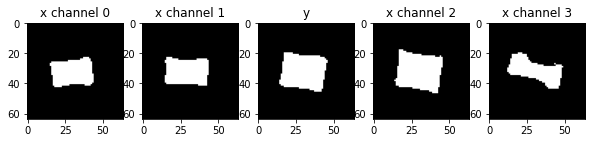

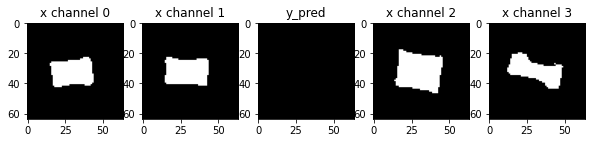

Loss: 0.694614052772522


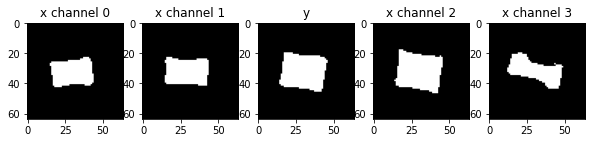

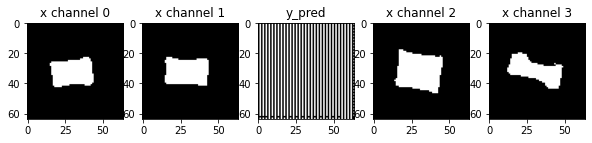

Loss: 0.6992199420928955


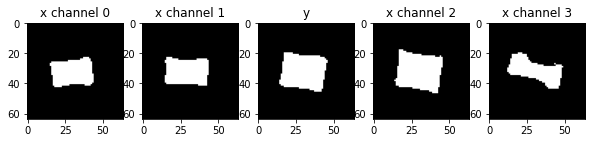

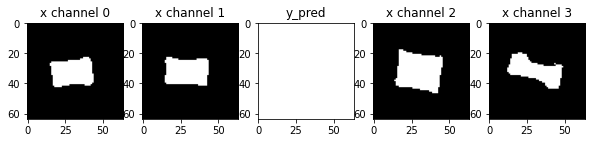

Loss: 0.7021912336349487


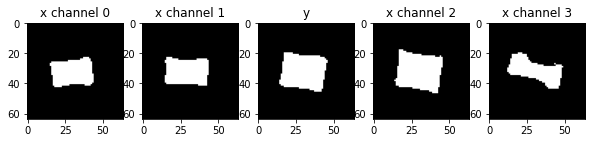

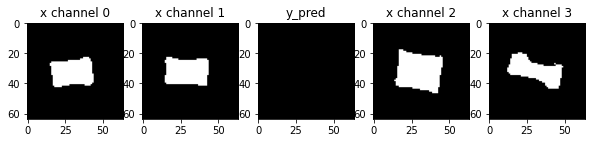

Loss: 0.7039682865142822


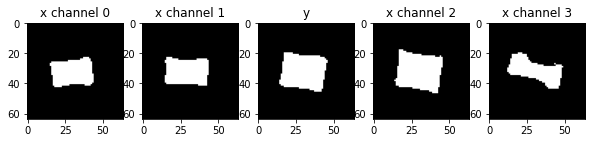

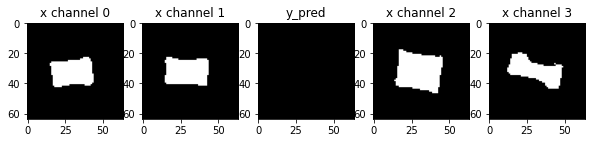

Loss: 0.70508873462677


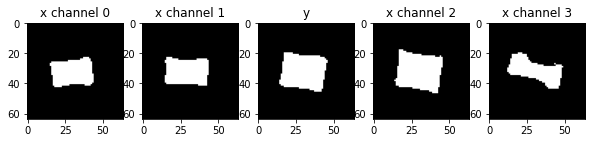

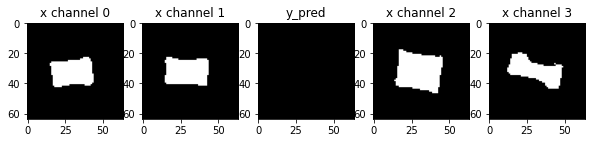

Loss: 0.7058168649673462


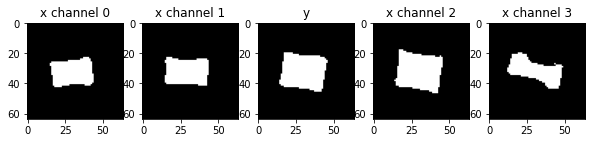

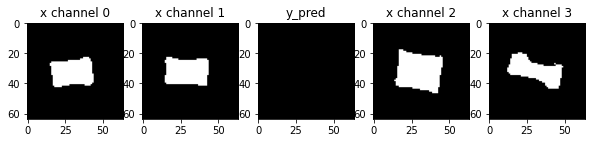

Loss: 0.706297755241394


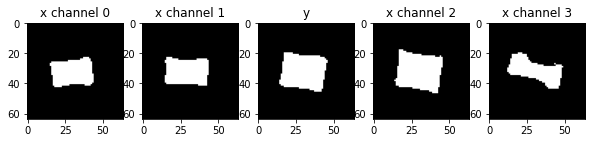

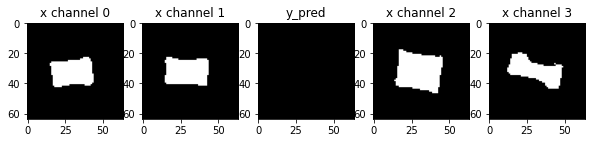

Loss: 0.7066200971603394


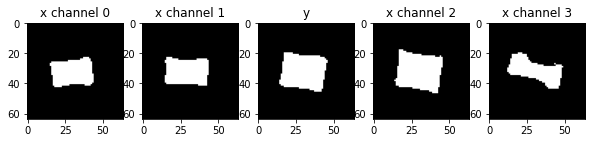

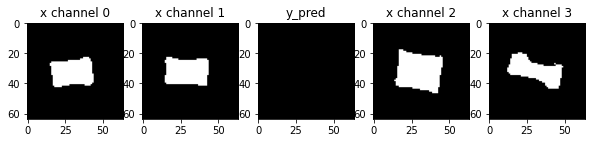

Loss: 0.7068378925323486


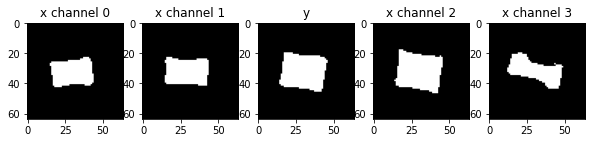

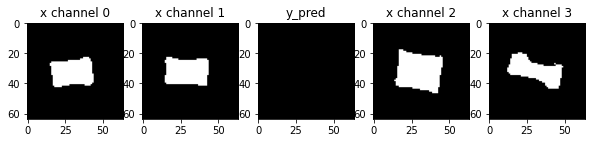

Loss: 0.707003116607666


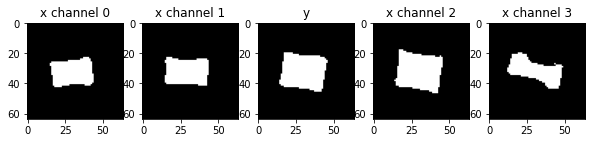

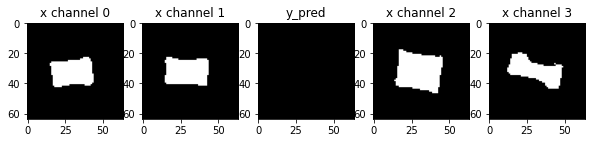

Loss: 0.7071675062179565


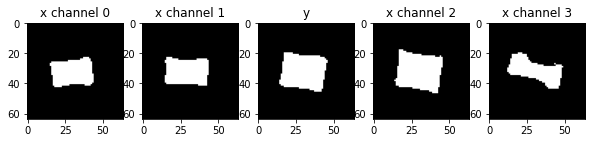

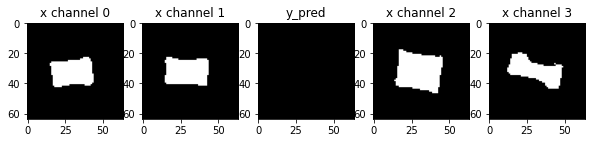

Loss: 0.7073574066162109


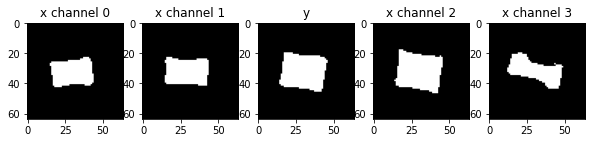

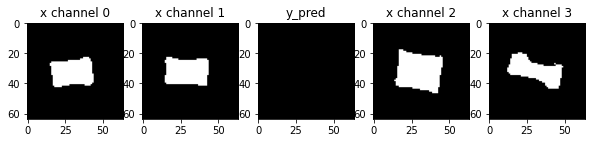

Loss: 0.7075234651565552


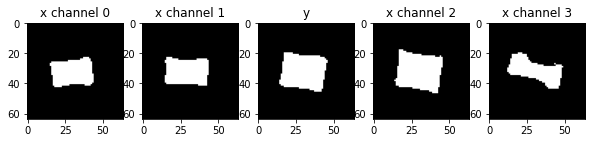

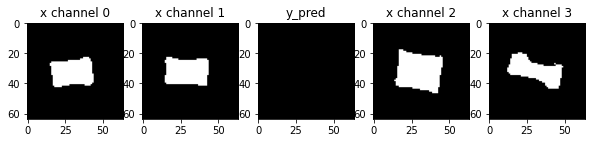

Loss: 0.7075889110565186


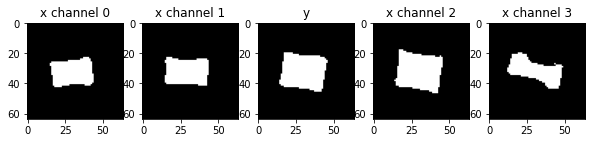

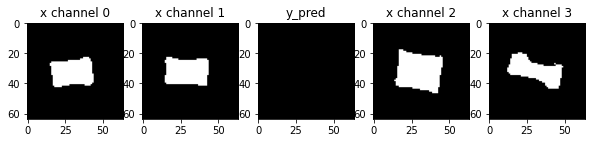

Loss: 0.7074872851371765


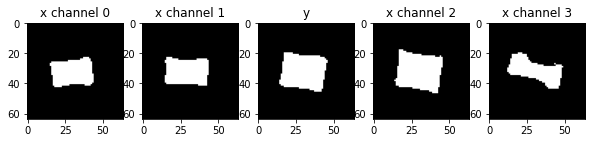

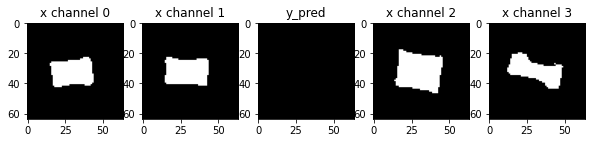

Loss: 0.7071210145950317


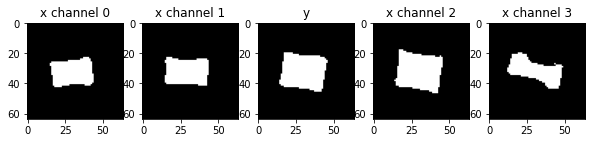

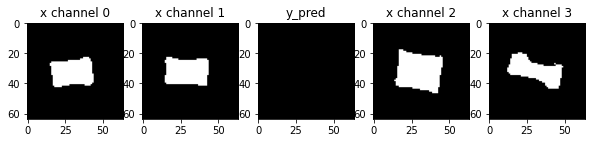

Loss: 0.7063071727752686


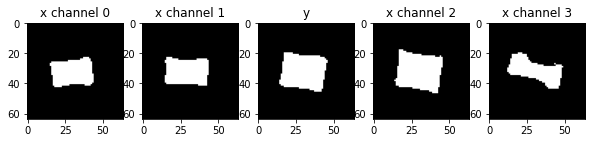

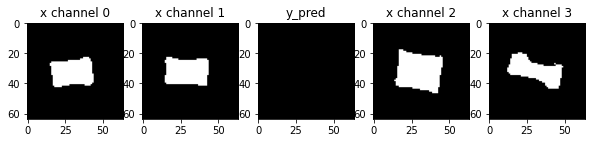

Loss: 0.7047460675239563


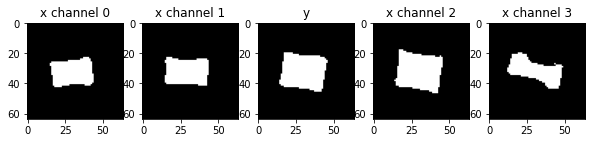

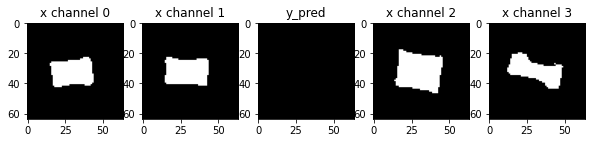

Loss: 0.7018204927444458


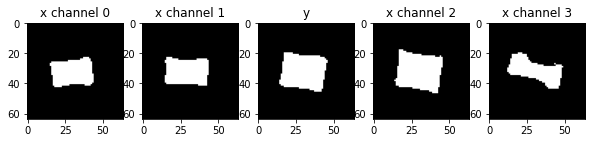

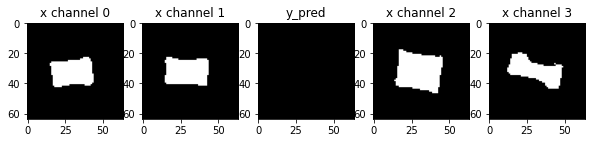

Loss: 0.6958925724029541


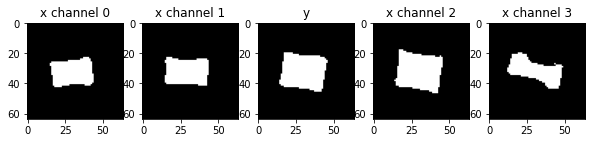

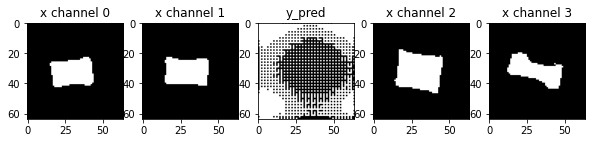

Loss: 0.6907913684844971


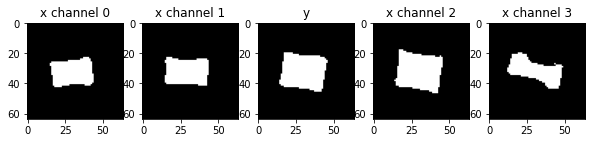

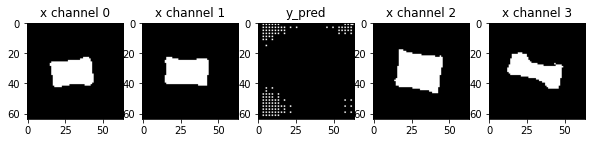

Loss: 0.6847093105316162


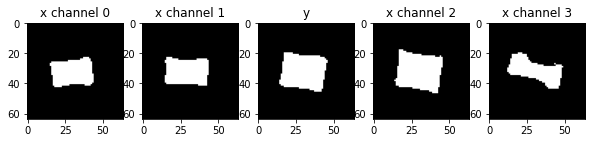

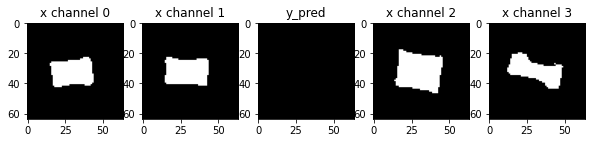

Loss: 0.6715775728225708


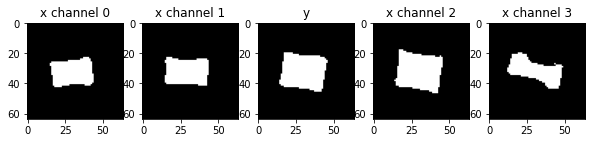

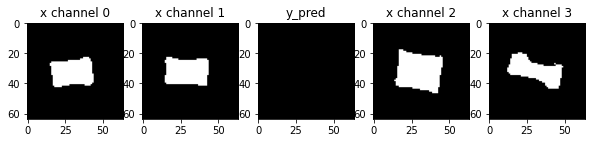

Loss: 0.637540340423584


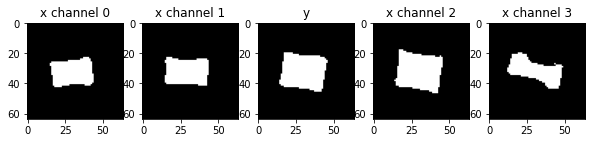

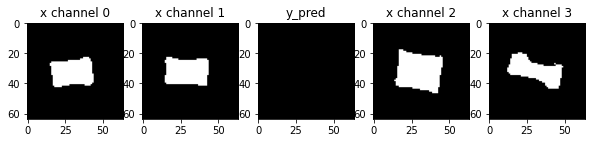

Loss: 0.539960503578186


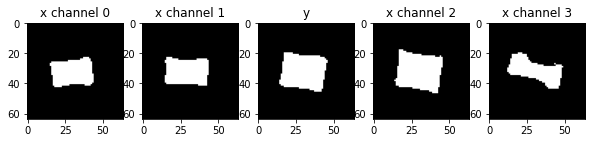

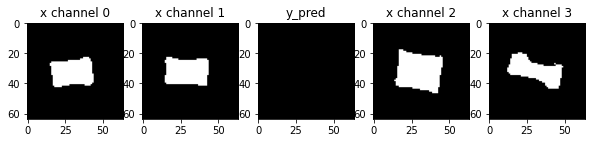

Loss: 0.46400153636932373


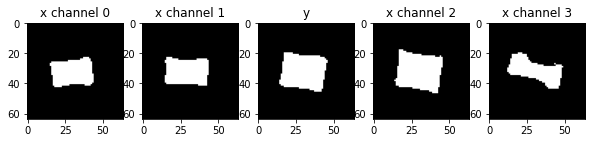

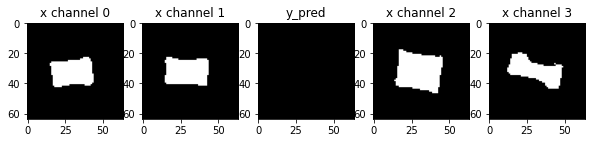

Loss: 0.5155343413352966


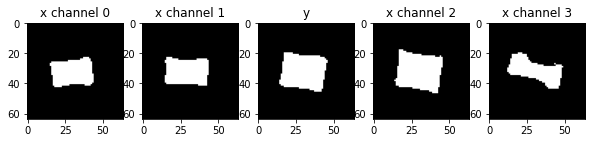

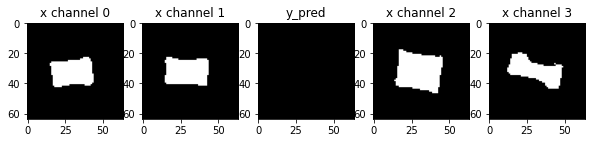

Loss: 0.42989736795425415


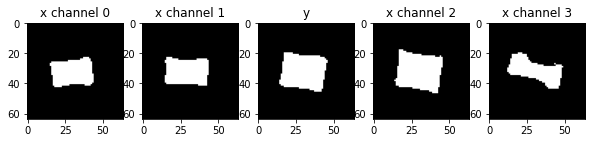

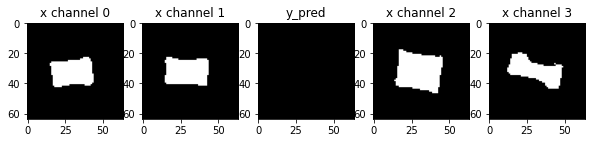

Loss: 0.48613178730010986


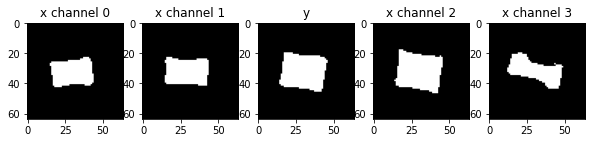

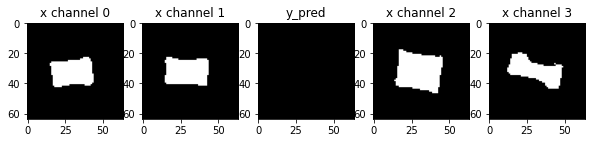

Loss: 0.46943598985671997


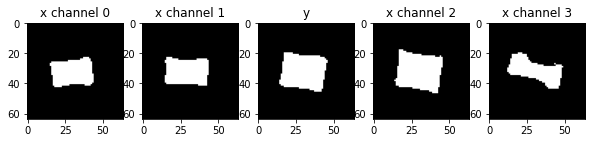

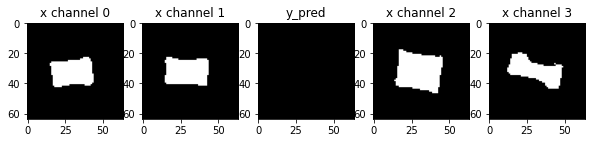

Loss: 0.3934519588947296


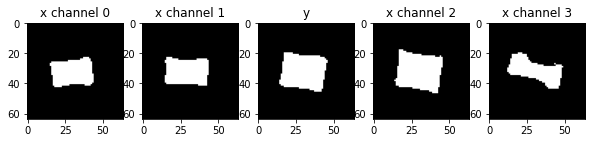

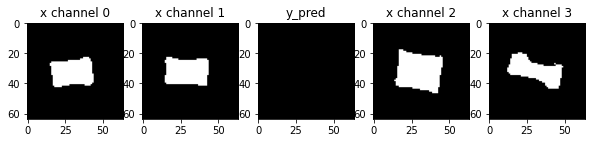

Loss: 0.42449191212654114


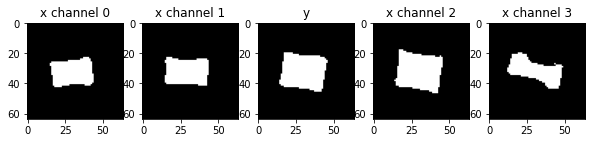

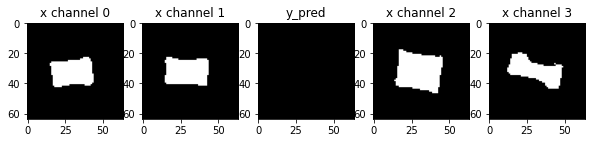

Loss: 0.39152801036834717


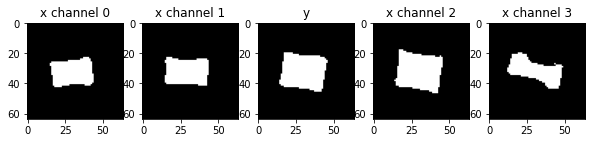

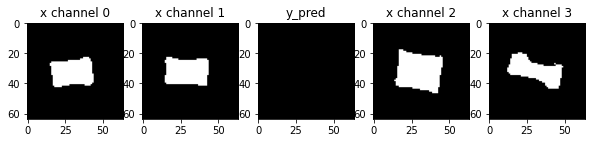

Loss: 0.35166266560554504


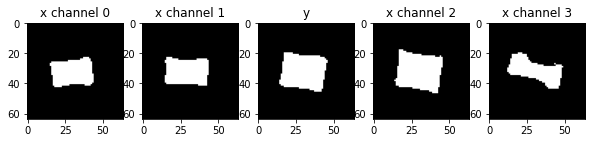

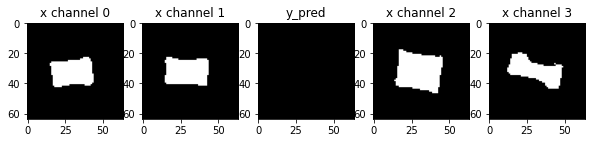

Loss: 0.37585288286209106


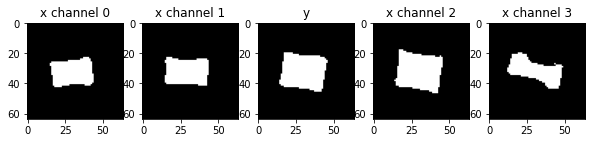

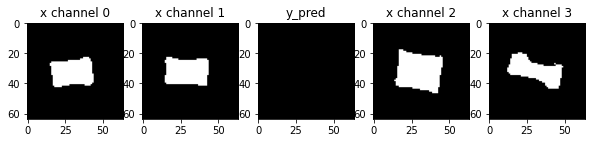

Loss: 0.34408819675445557


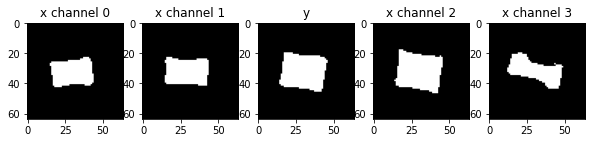

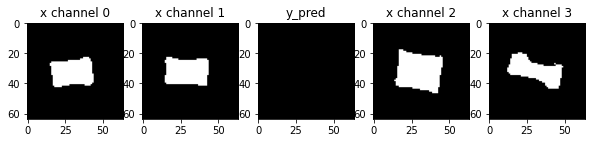

Loss: 0.3215716481208801


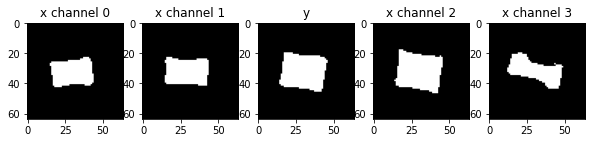

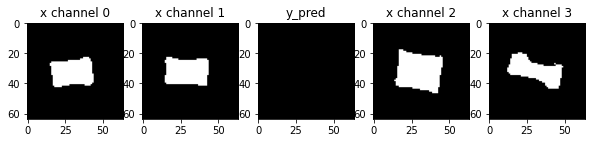

Loss: 0.35495811700820923


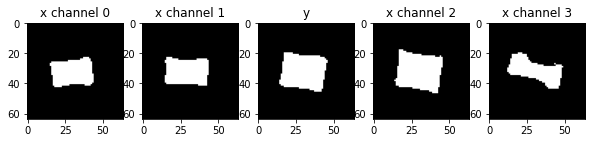

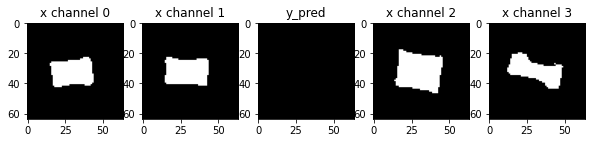

Loss: 0.31176477670669556


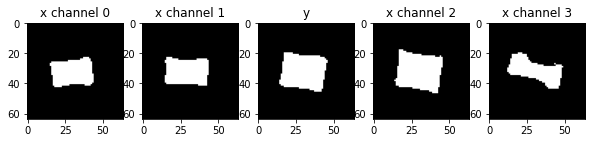

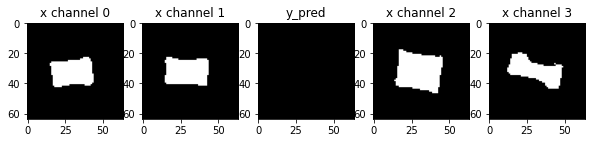

Loss: 0.3168337047100067


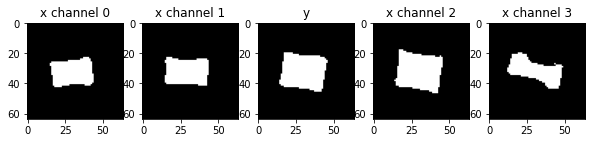

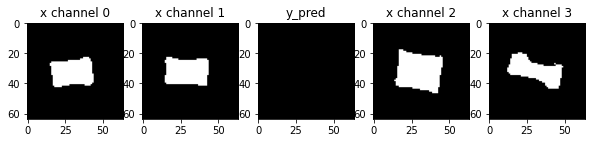

Loss: 0.3248785138130188


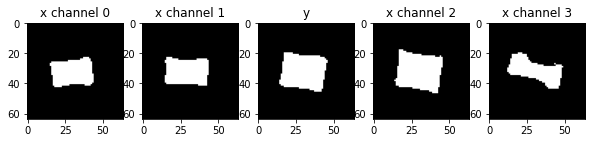

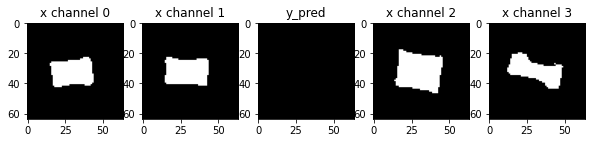

Loss: 0.2972501516342163


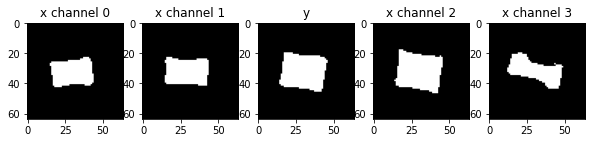

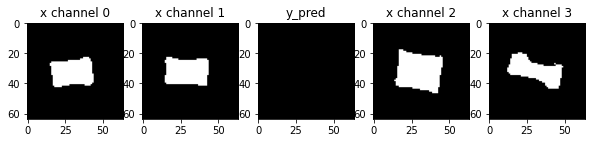

Loss: 0.2973092496395111


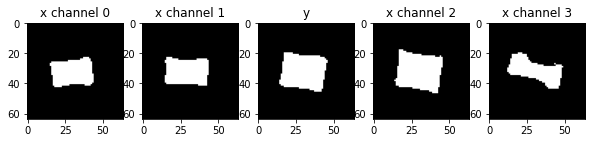

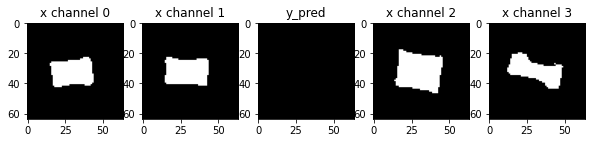

Loss: 0.30343756079673767


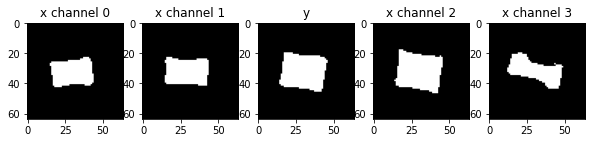

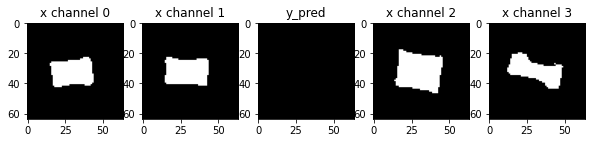

Loss: 0.2780832052230835


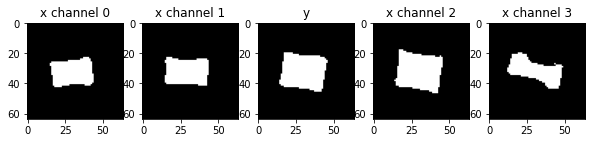

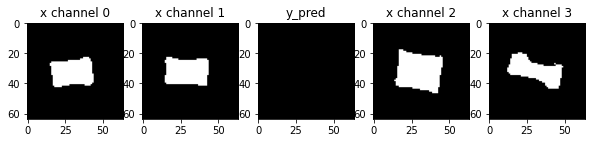

Loss: 0.2834731340408325


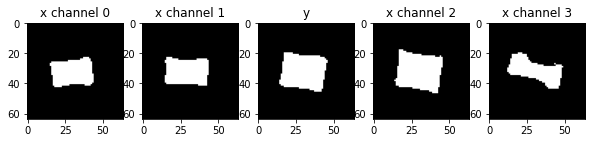

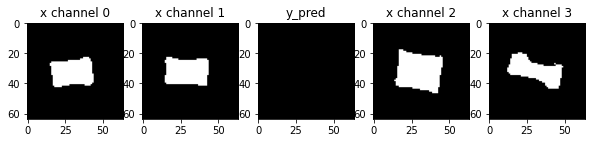

Loss: 0.27873238921165466


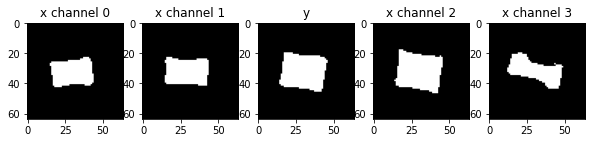

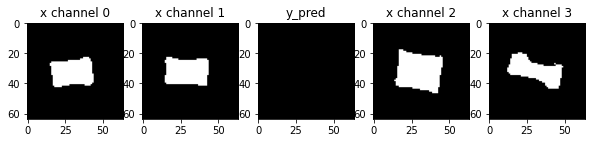

Loss: 0.25741901993751526


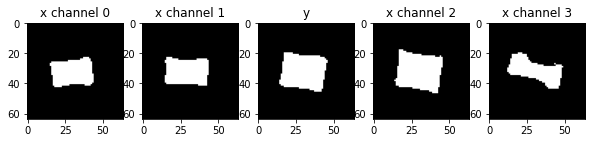

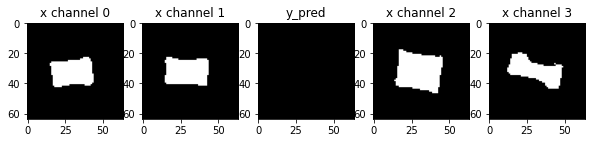

Loss: 0.25314831733703613


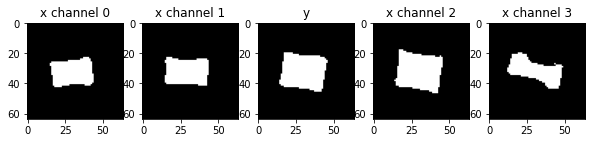

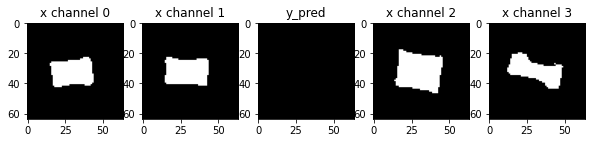

Loss: 0.2310594767332077


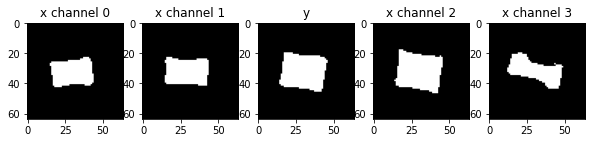

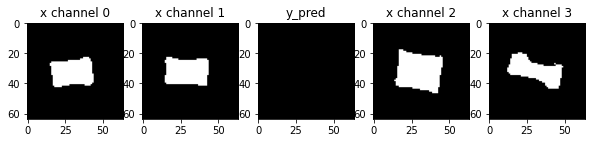

Loss: 0.2047373652458191


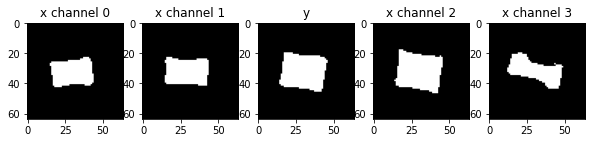

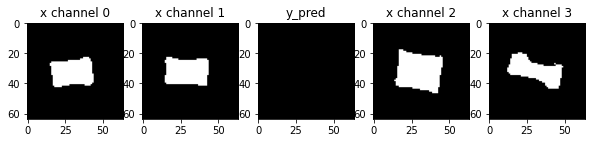

Loss: 0.1911868453025818


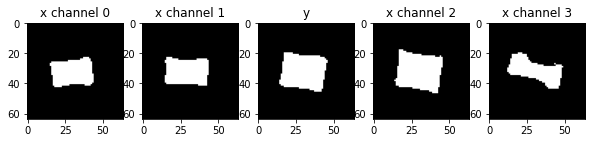

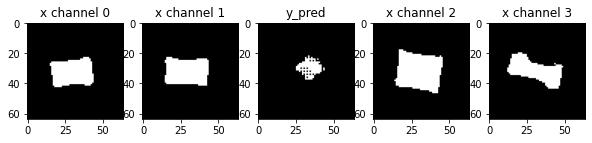

Loss: 0.16135144233703613


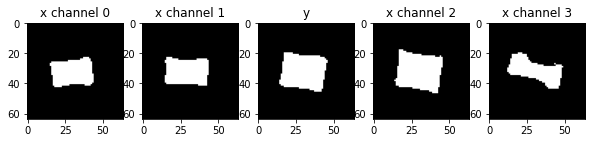

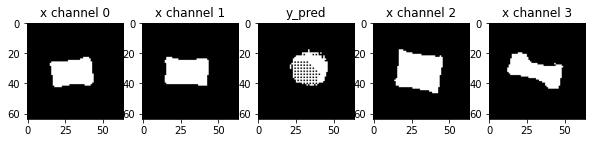

Loss: 0.16481620073318481


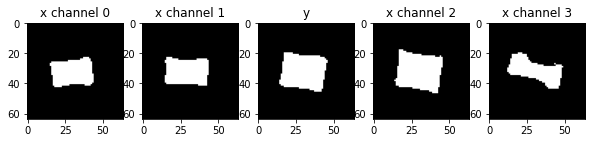

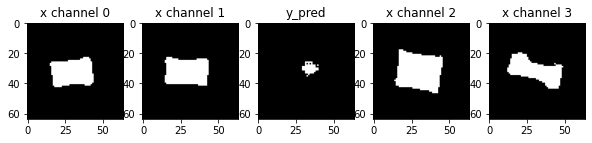

Loss: 0.11809857189655304


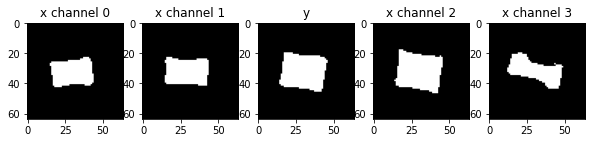

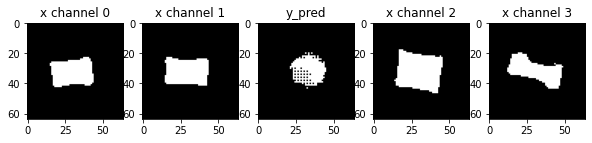

Loss: 0.34784889221191406


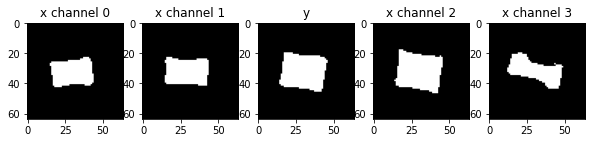

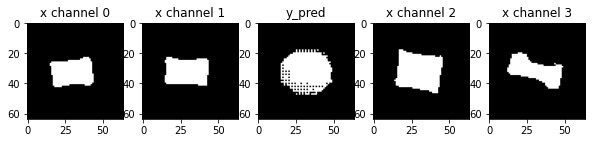

Loss: 0.9593443870544434


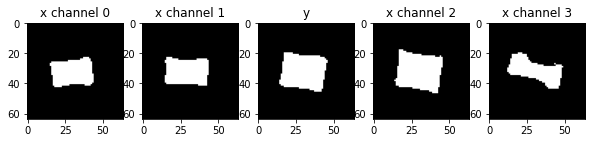

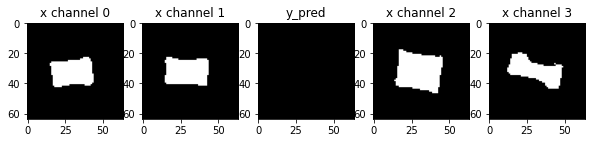

Loss: 0.20954857766628265


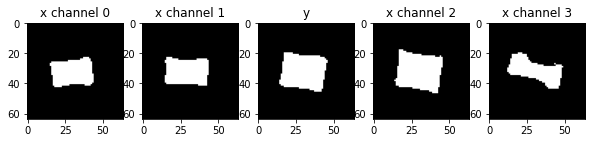

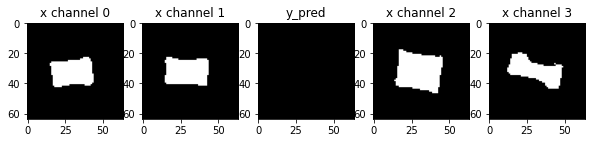

Loss: 0.31186988949775696


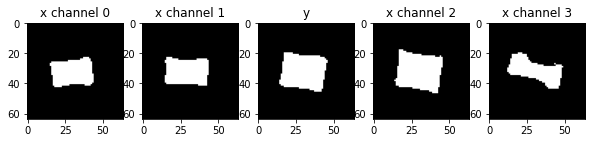

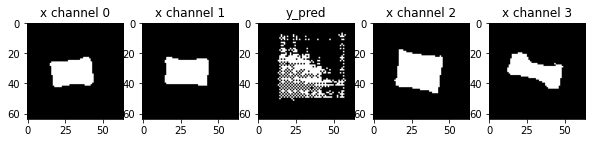

Loss: 0.37481242418289185


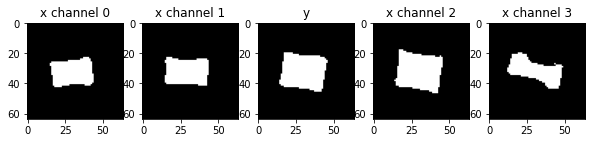

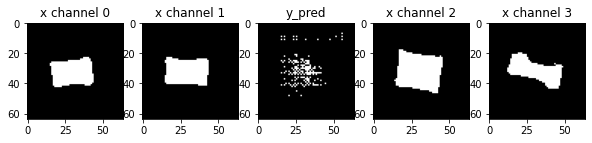

Loss: 0.4002068042755127


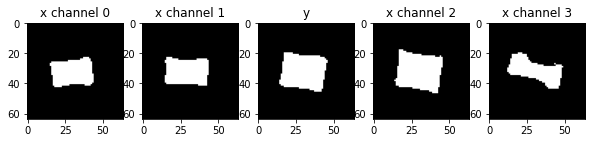

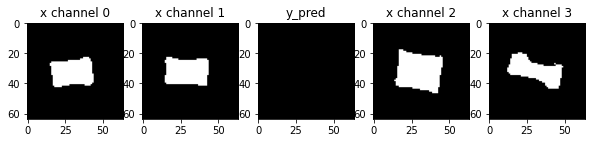

Loss: 0.3780064582824707


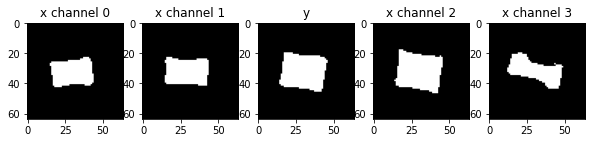

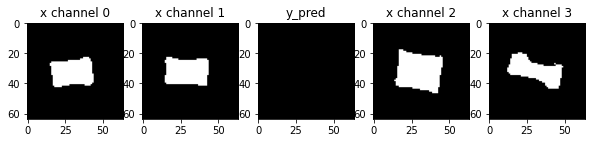

Loss: 0.30408838391304016


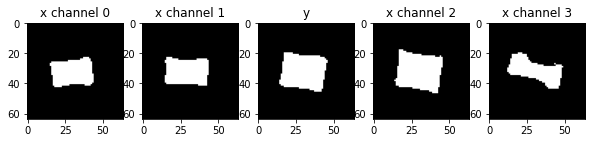

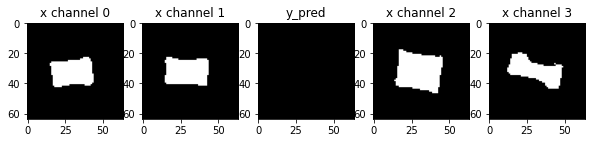

Loss: 0.21498572826385498


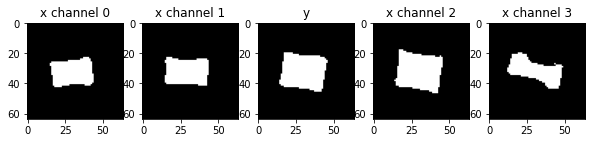

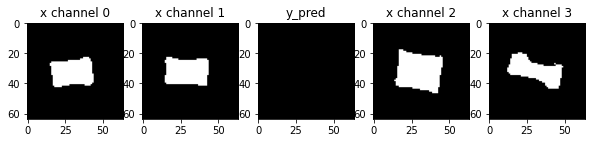

Loss: 0.24638718366622925


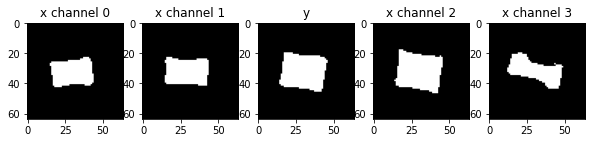

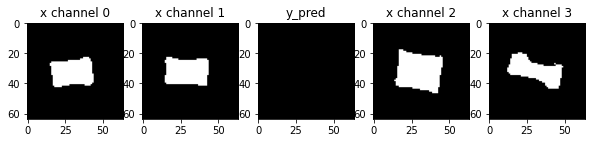

Loss: 0.29141688346862793


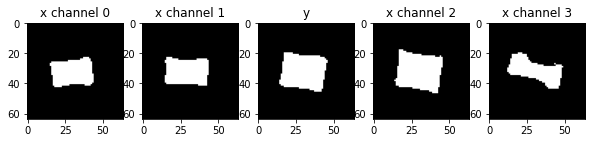

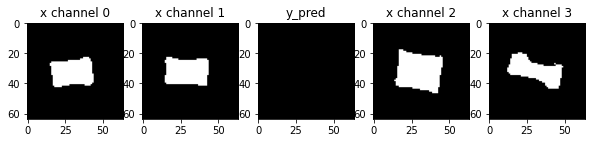

Loss: 0.21634288132190704


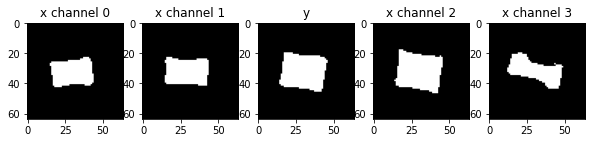

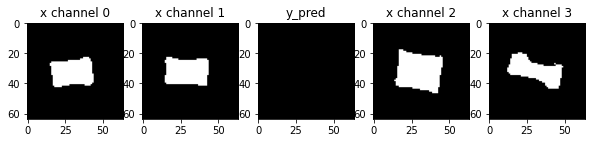

Loss: 0.19534409046173096


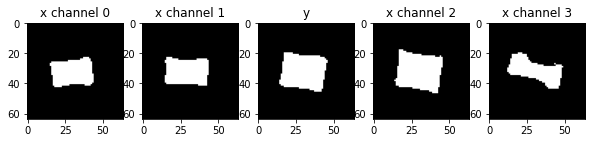

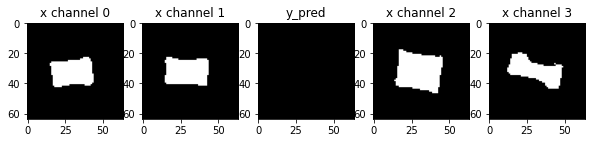

Loss: 0.2258608341217041


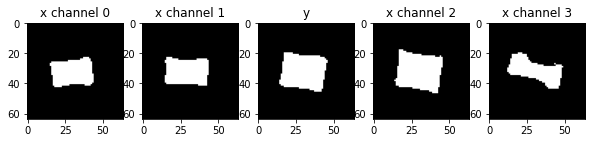

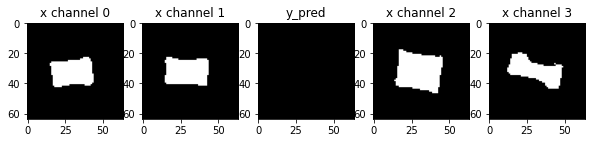

Loss: 0.22375601530075073


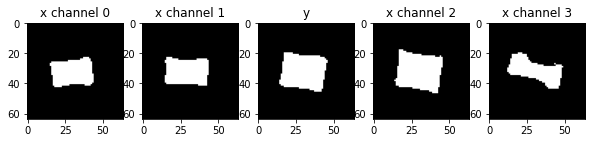

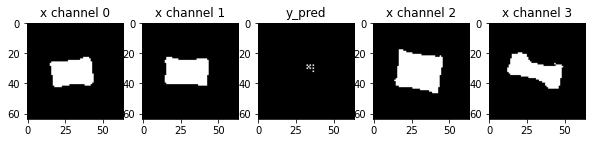

Loss: 0.18867343664169312


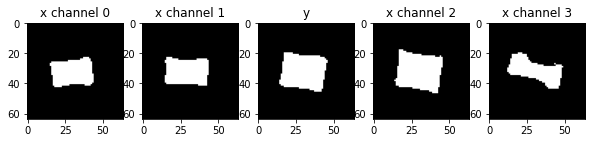

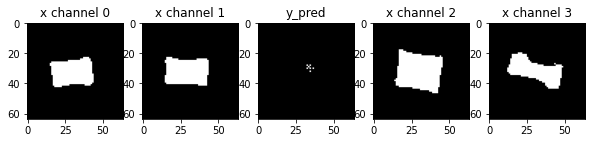

Loss: 0.1637348234653473


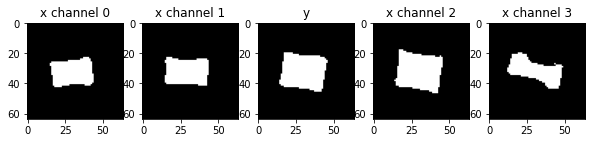

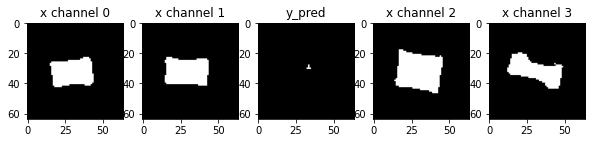

Loss: 0.16683773696422577


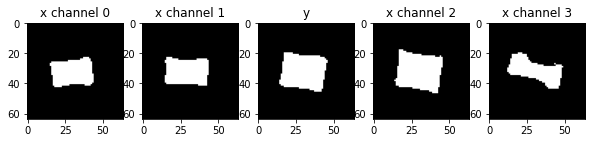

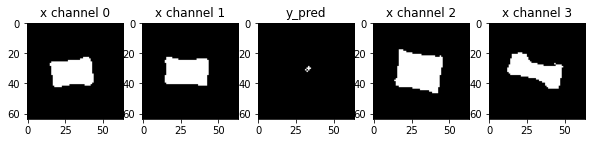

Loss: 0.17639663815498352


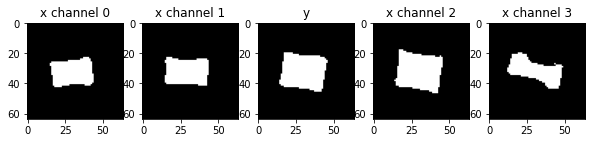

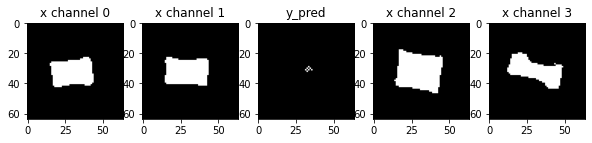

Loss: 0.16921952366828918


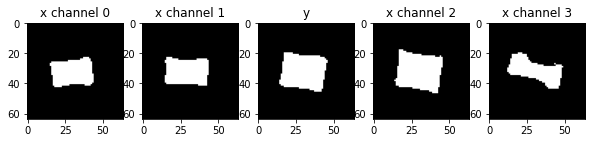

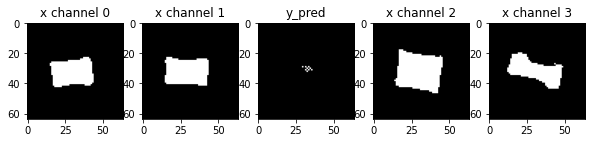

Loss: 0.15515246987342834


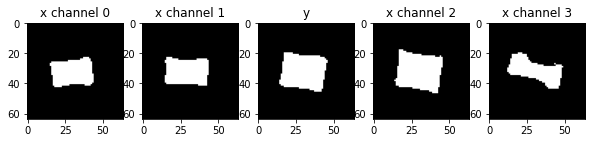

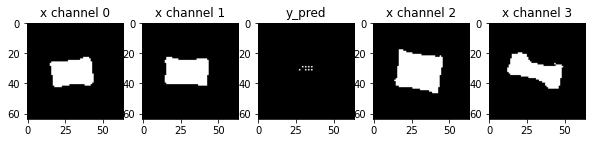

Loss: 0.15021677315235138


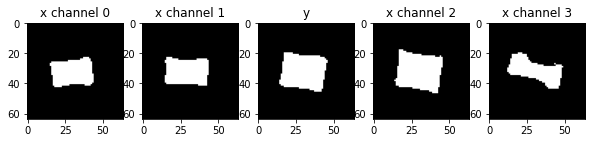

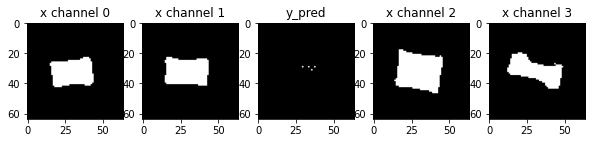

Loss: 0.15386489033699036


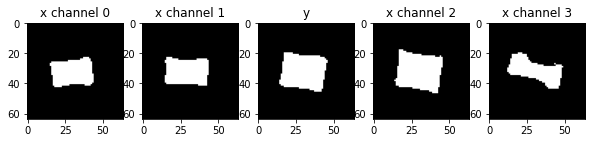

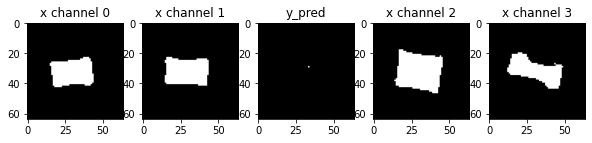

Loss: 0.15944704413414001


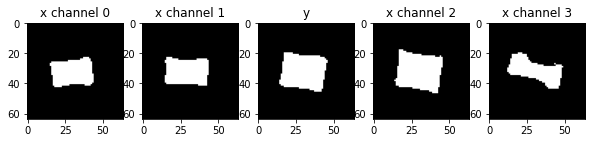

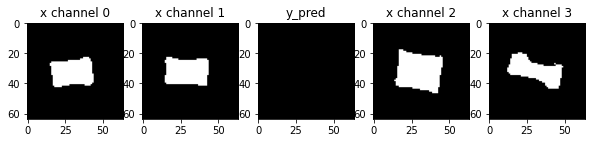

Loss: 0.16050240397453308


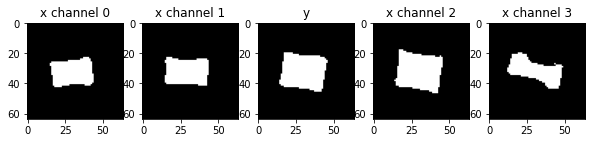

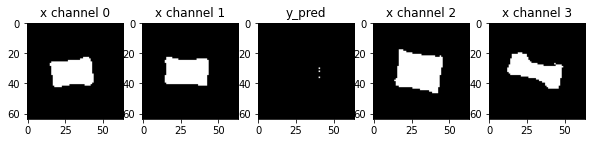

Loss: 0.15582923591136932


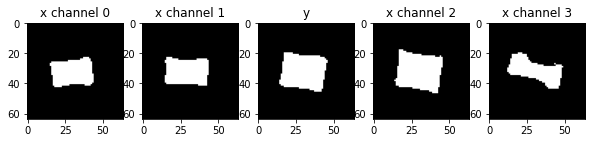

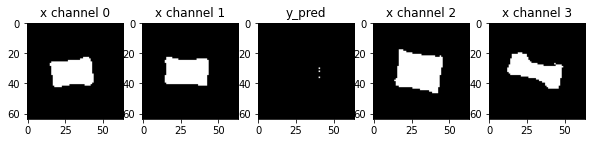

Loss: 0.14944912493228912


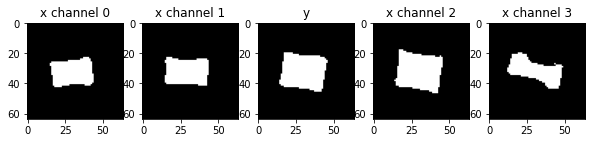

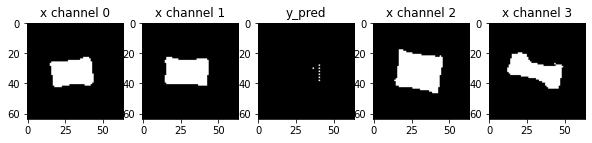

Loss: 0.14629417657852173


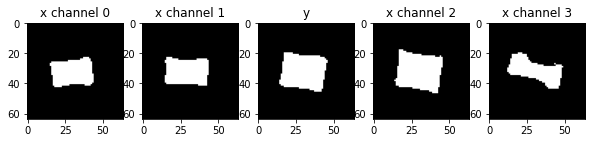

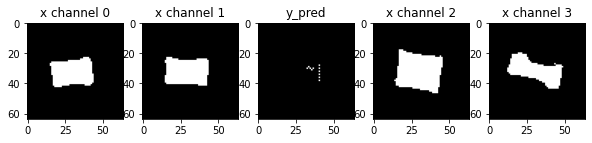

Loss: 0.14684534072875977


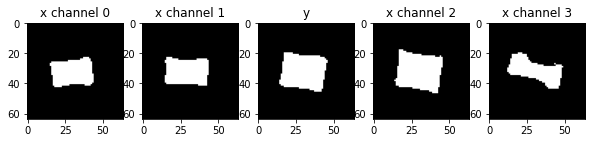

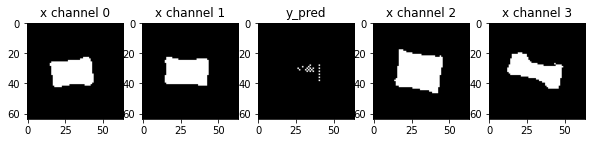

Loss: 0.14745962619781494


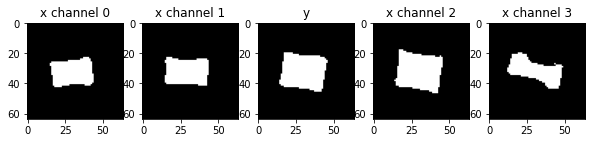

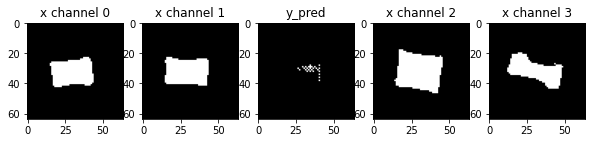

Loss: 0.14504295587539673


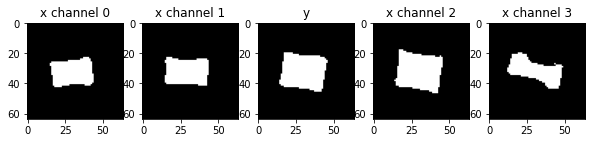

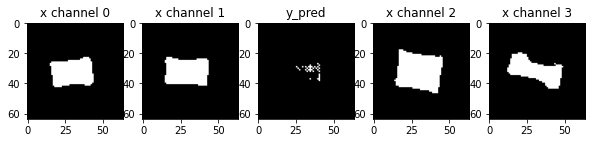

Loss: 0.14018544554710388


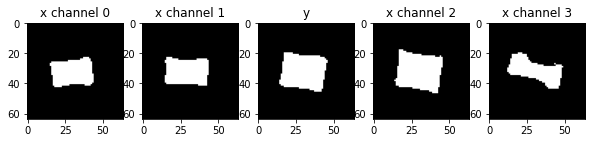

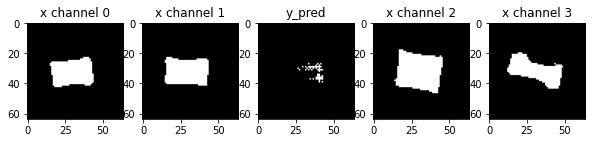

Loss: 0.13603468239307404


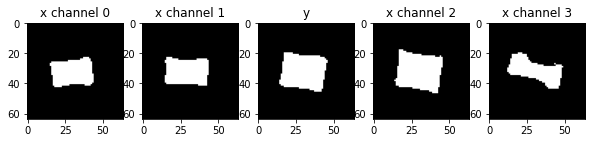

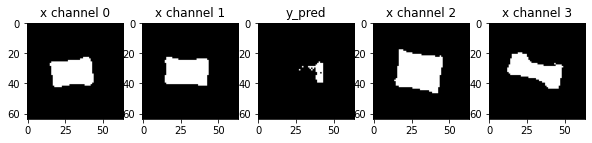

Loss: 0.1346101462841034


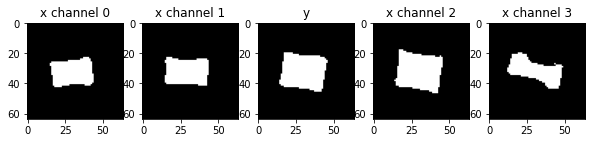

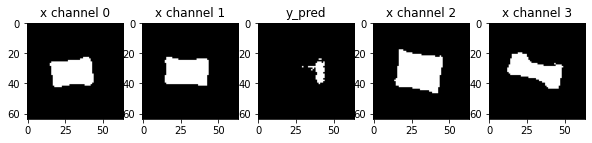

Loss: 0.13489031791687012


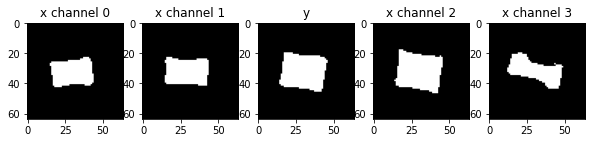

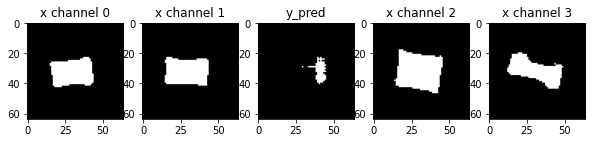

Loss: 0.13461527228355408


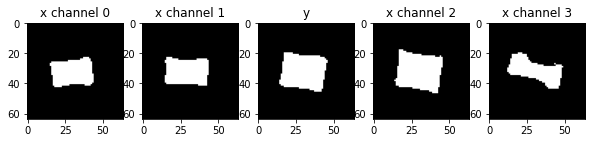

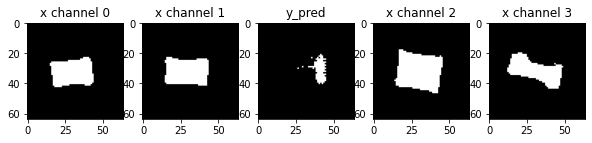

Loss: 0.13256293535232544


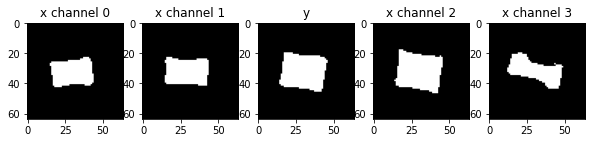

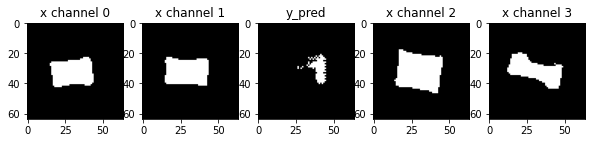

Loss: 0.12914066016674042


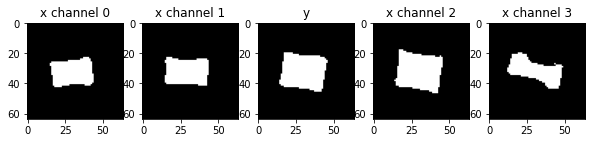

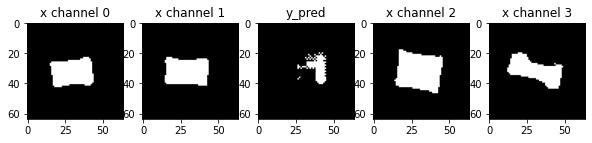

Loss: 0.1259060800075531


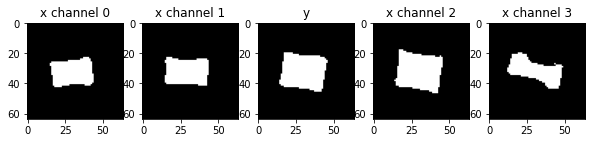

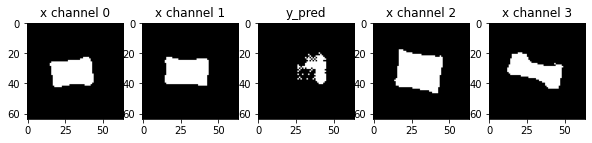

Loss: 0.12387676537036896


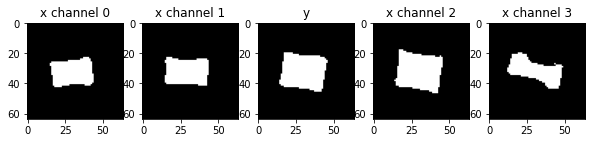

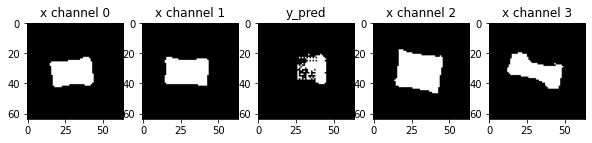

Loss: 0.12243471294641495


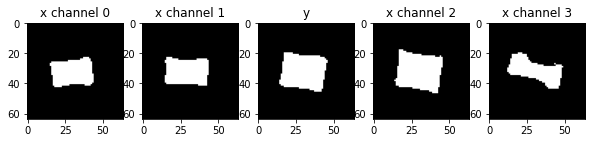

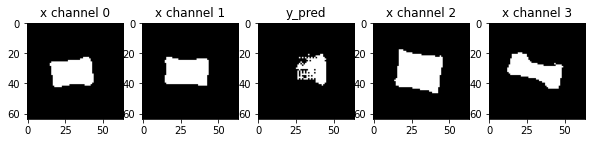

Loss: 0.12010112404823303


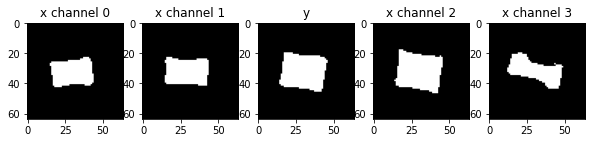

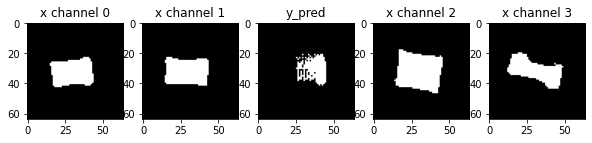

Loss: 0.11641842126846313


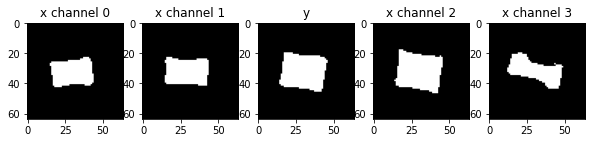

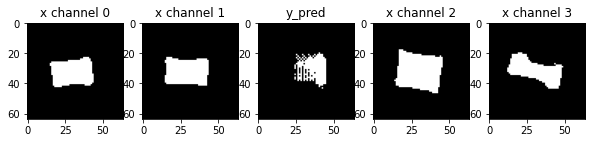

Loss: 0.11254173517227173


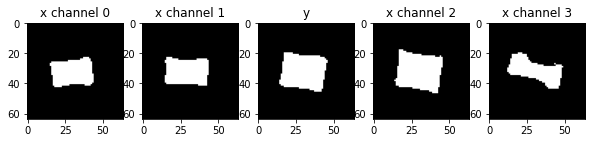

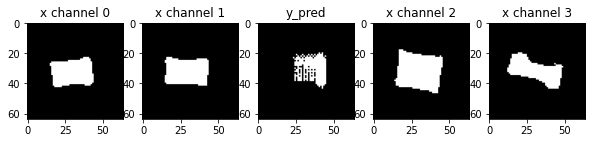

Loss: 0.10942074656486511


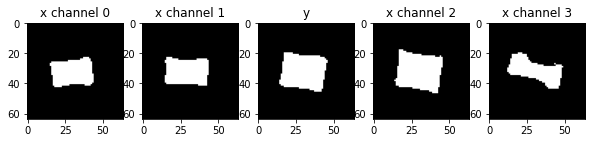

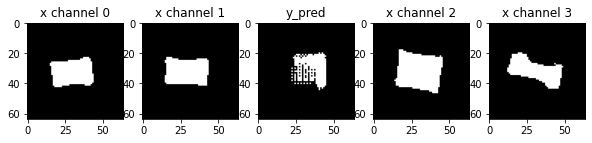

Loss: 0.10664217919111252


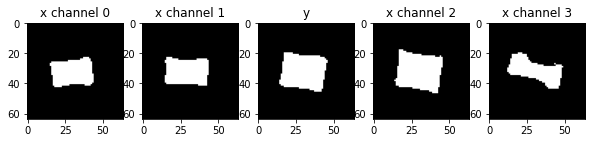

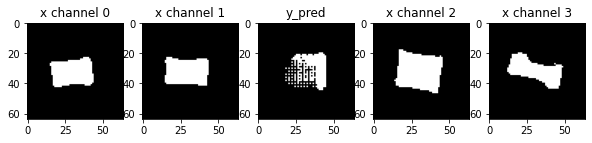

Loss: 0.10359547287225723


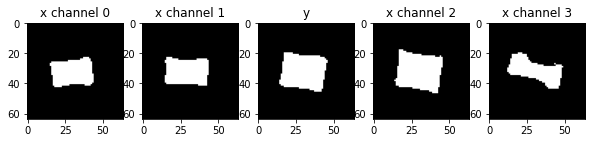

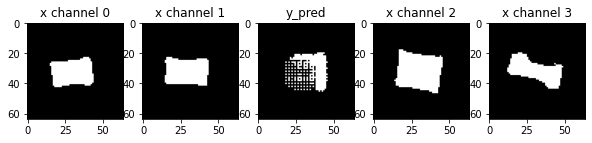

Loss: 0.10007701814174652


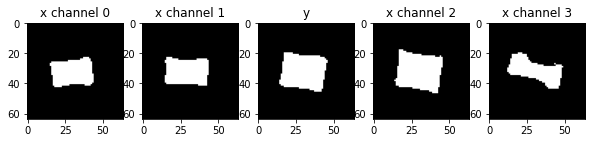

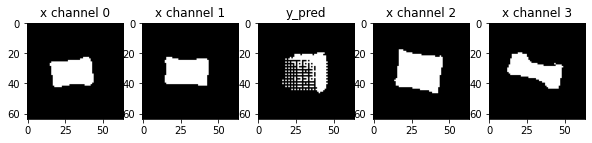

Loss: 0.09630083292722702


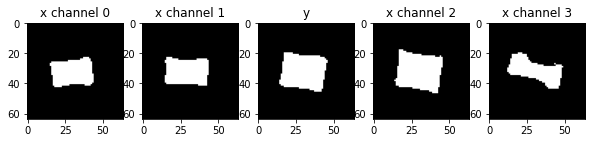

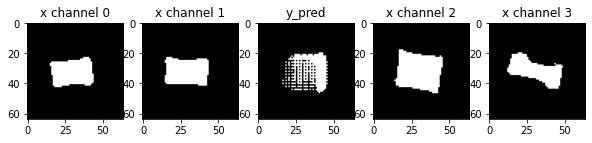

Loss: 0.09339602291584015


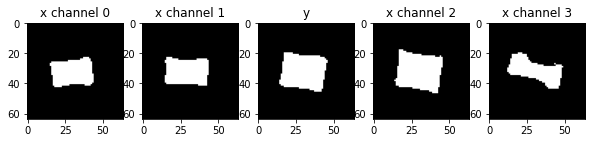

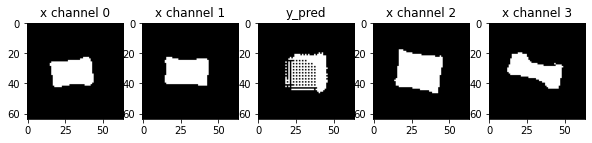

Loss: 0.09163956344127655


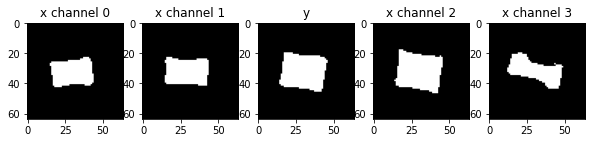

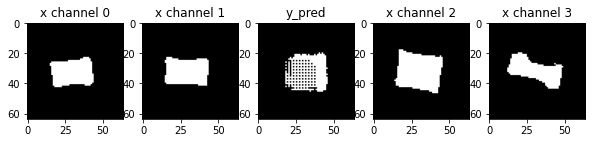

Loss: 0.08941980451345444


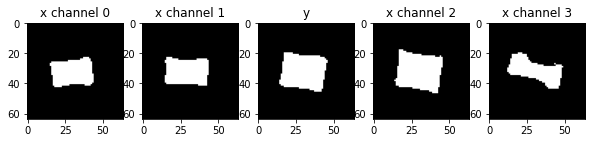

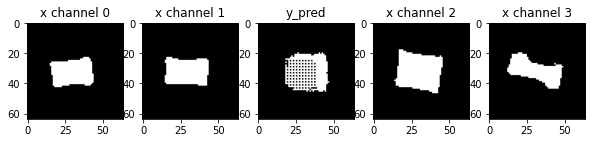

Loss: 0.08765845000743866


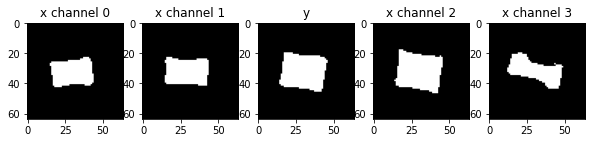

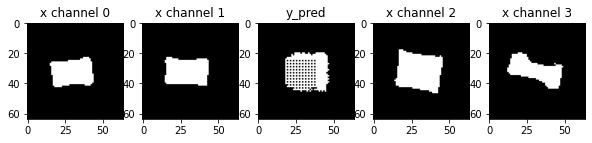

Loss: 0.08424174040555954


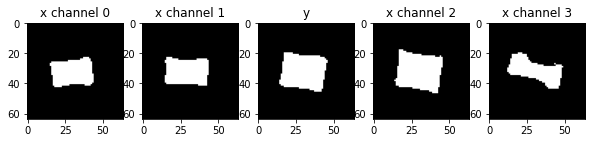

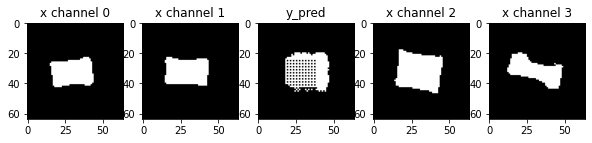

Loss: 0.0810704305768013


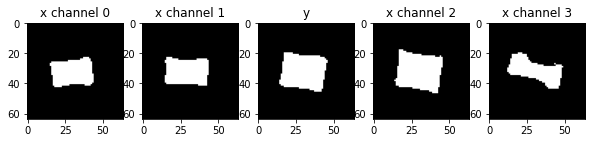

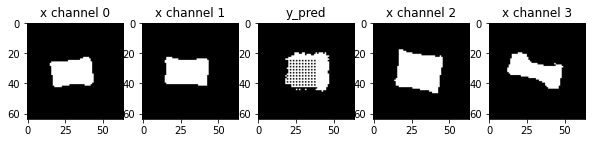

Loss: 0.07779911905527115


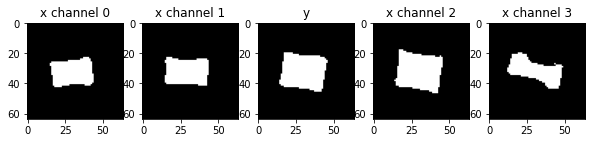

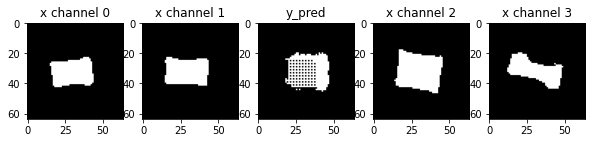

Loss: 0.07378210127353668


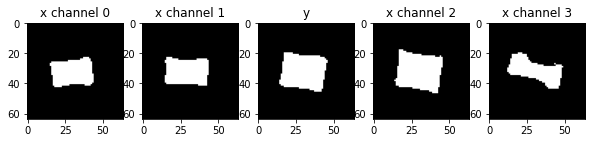

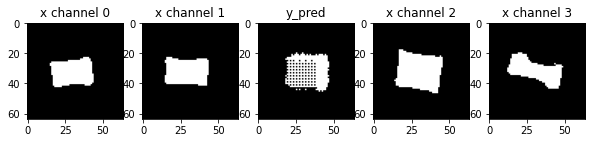

Loss: 0.07081456482410431


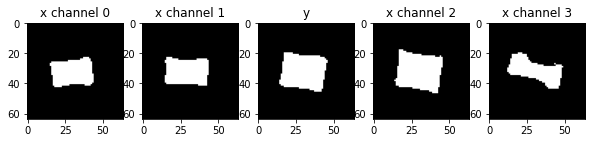

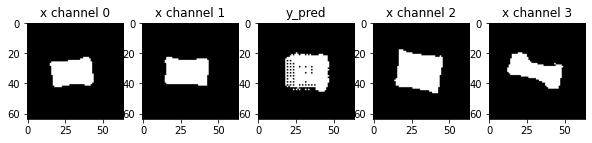

Loss: 0.06837601214647293


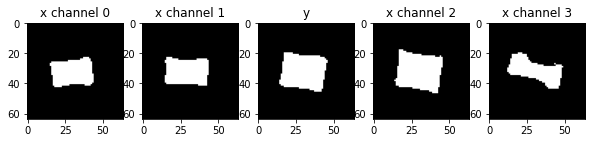

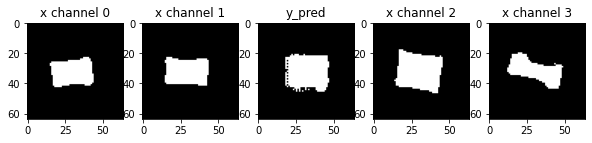

Loss: 0.06649009883403778


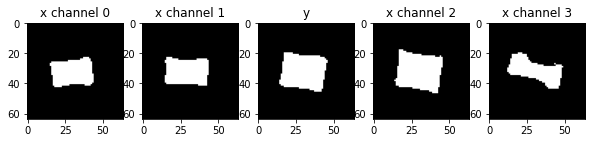

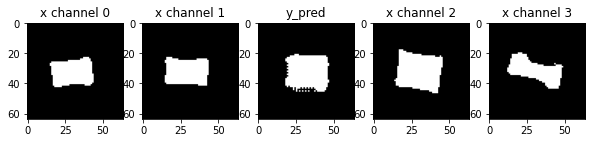

Loss: 0.06582030653953552


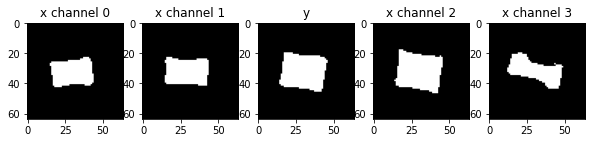

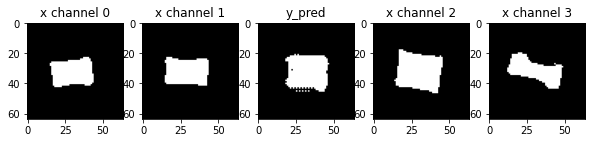

Loss: 0.06444353610277176


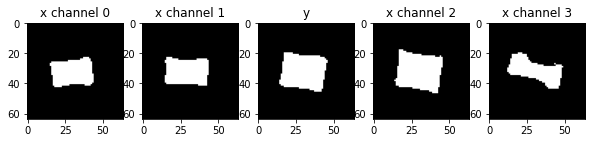

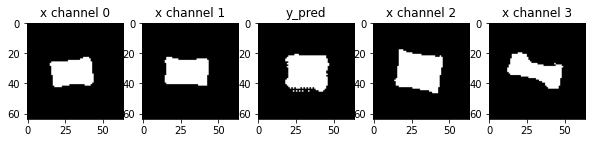

Loss: 0.06337960064411163


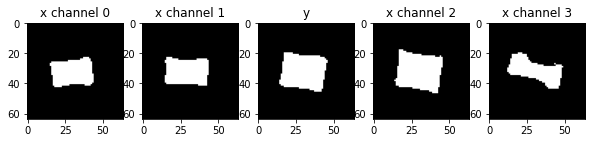

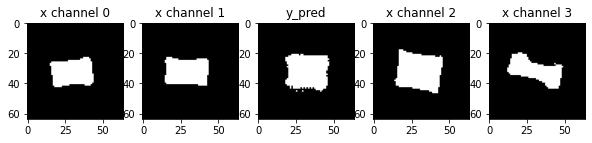

Loss: 0.06248991936445236


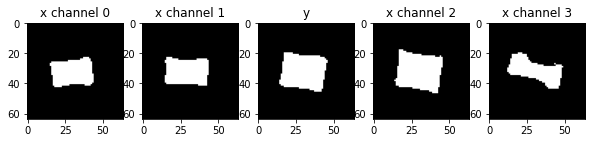

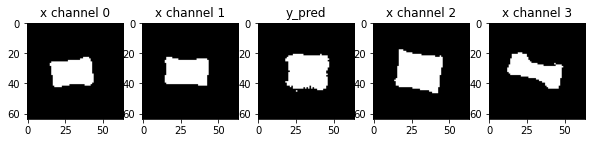

Loss: 0.06181585043668747


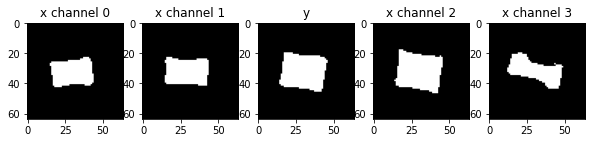

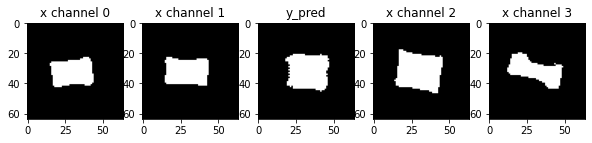

Loss: 0.06084752827882767


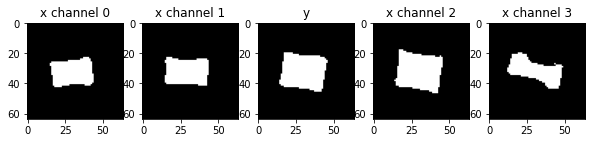

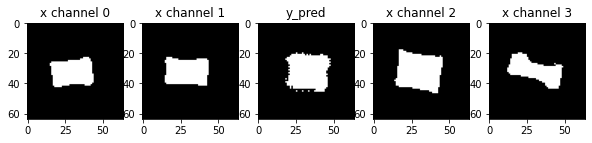

Loss: 0.06005854904651642


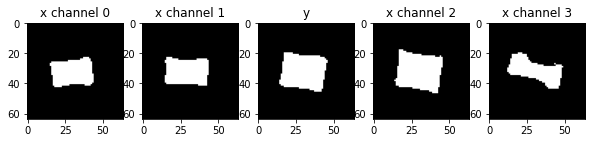

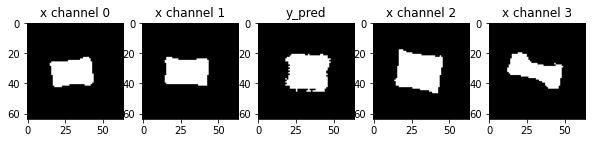

Loss: 0.059170275926589966


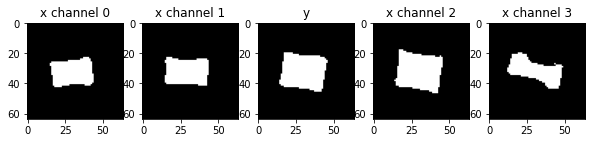

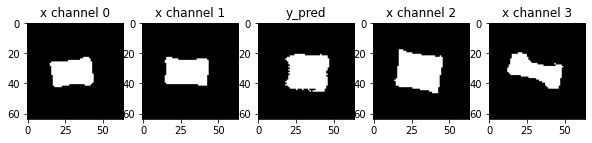

Loss: 0.05779179185628891


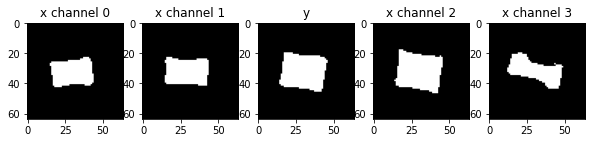

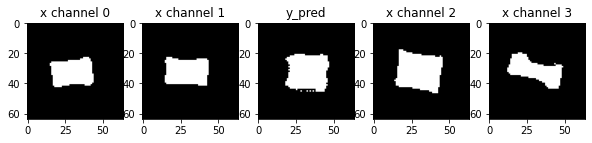

Loss: 0.05690625682473183


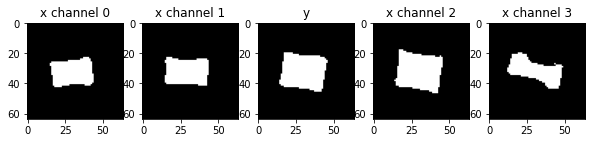

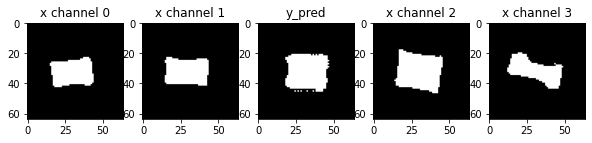

Loss: 0.056187212467193604


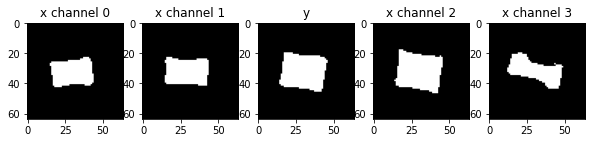

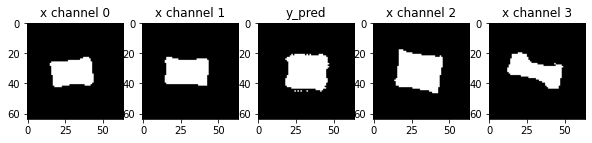

Loss: 0.055624283850193024


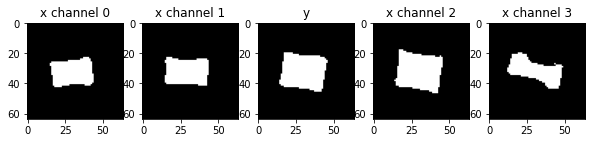

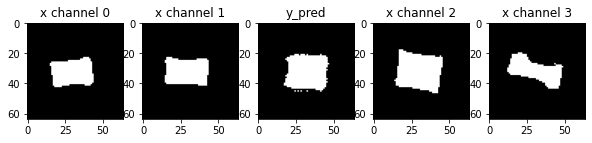

Loss: 0.05497635900974274


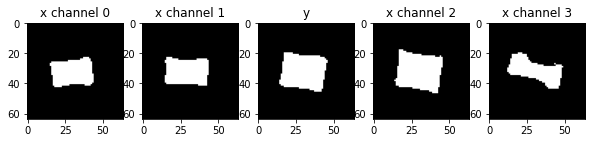

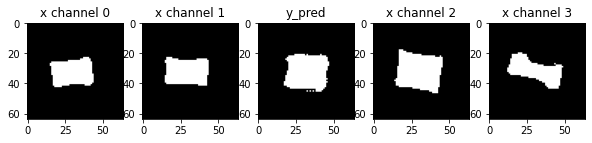

Loss: 0.05444824695587158


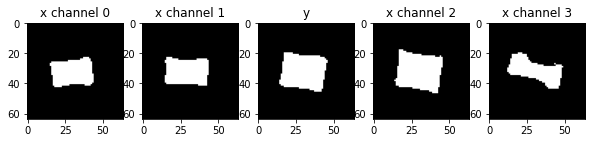

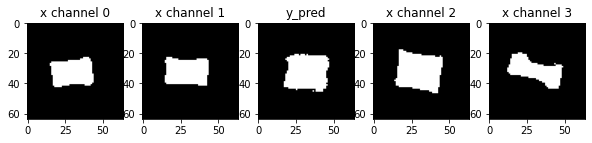

Loss: 0.05391004681587219


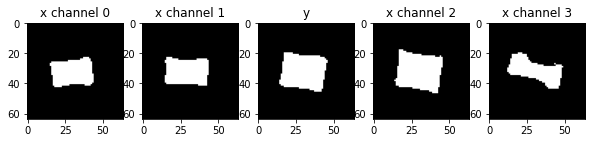

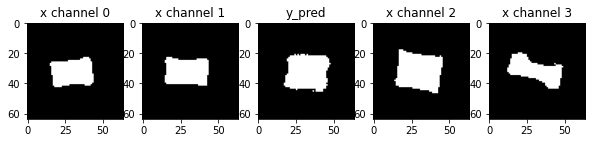

Loss: 0.05338868498802185


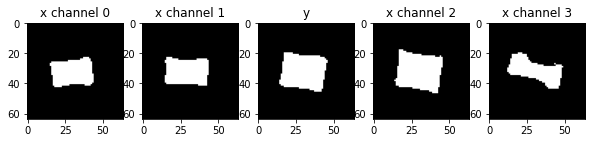

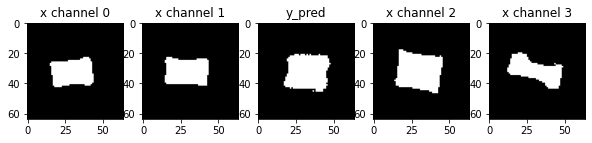

Loss: 0.05319317802786827


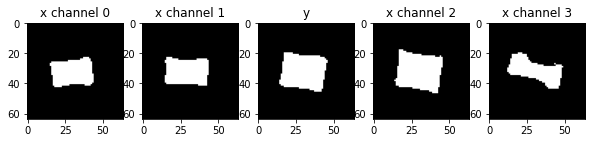

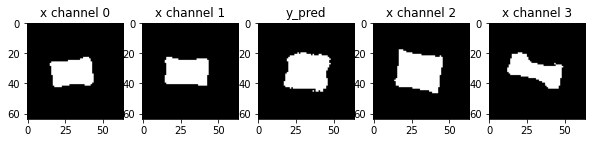

Loss: 0.05265873670578003


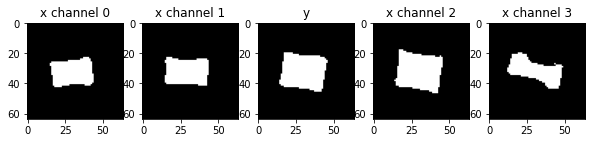

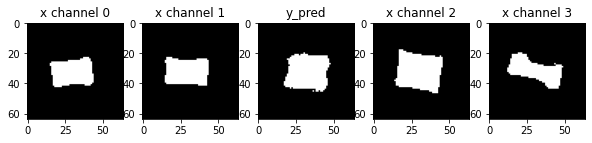

Loss: 0.05199127644300461


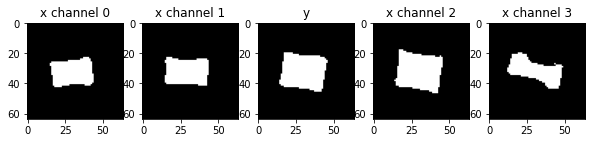

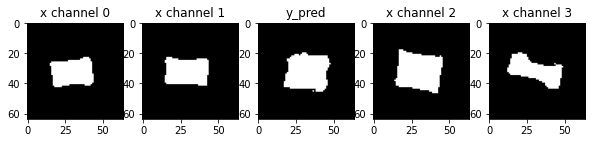

Loss: 0.05170413479208946


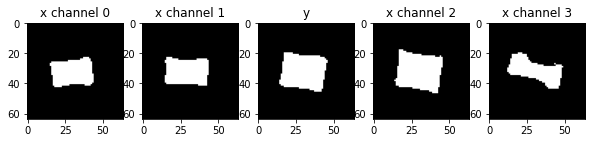

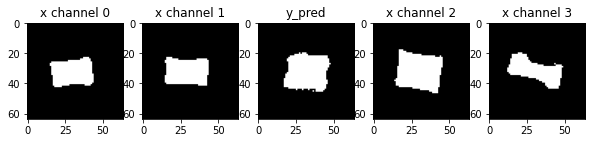

Loss: 0.05138300359249115


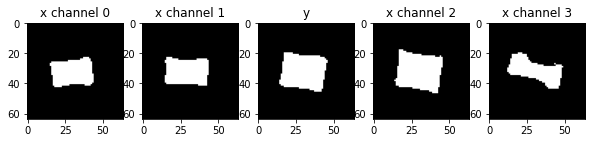

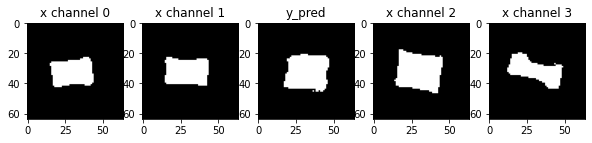

Loss: 0.0508602112531662


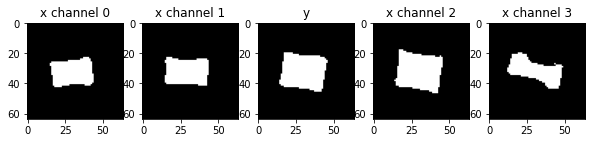

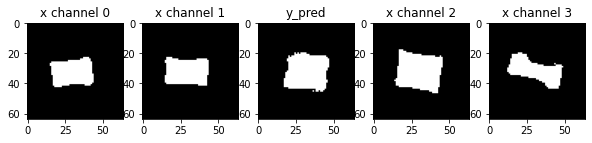

Loss: 0.05039467662572861


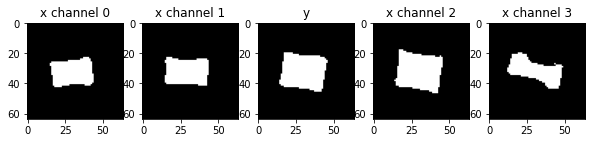

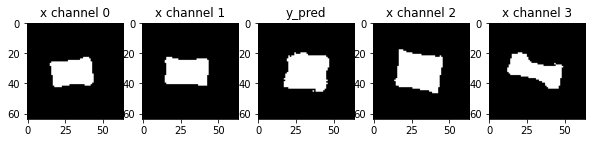

Loss: 0.05001088231801987


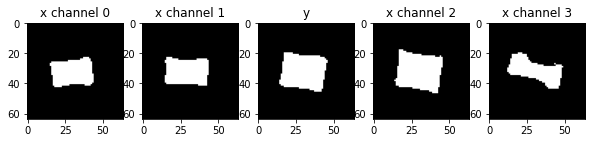

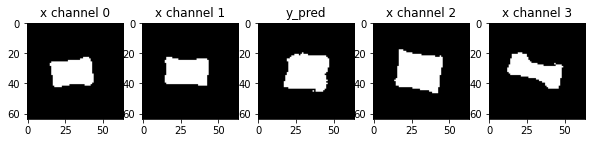

Loss: 0.04976309835910797


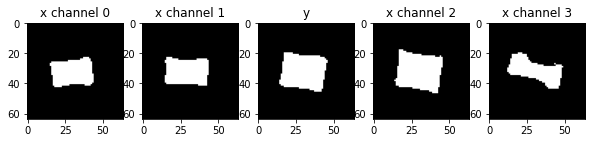

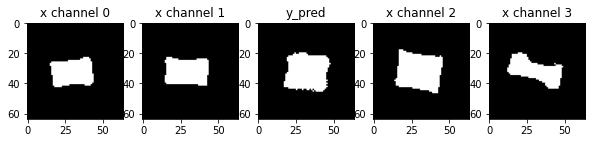

Loss: 0.04957154393196106


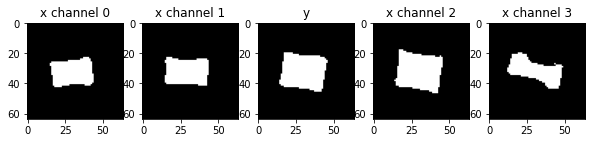

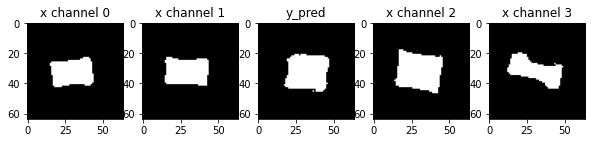

Loss: 0.04919297248125076


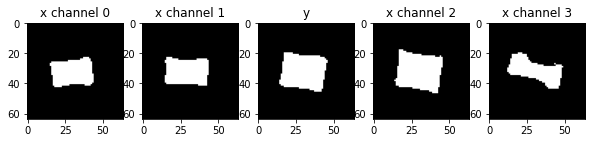

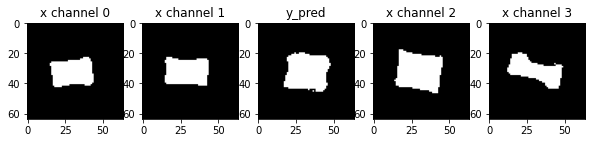

Loss: 0.04896701127290726


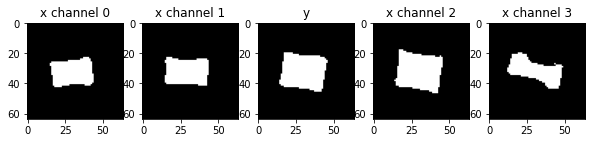

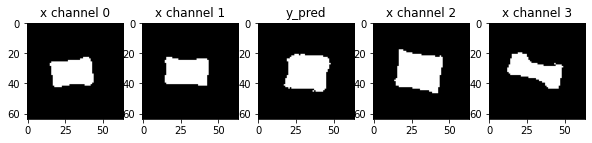

Loss: 0.048546381294727325


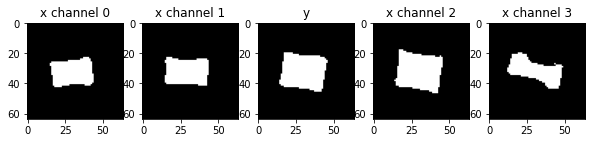

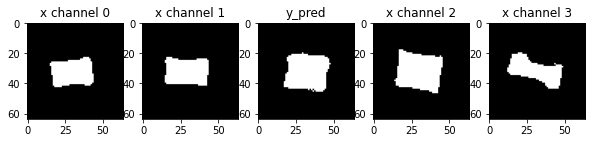

Loss: 0.0482989102602005


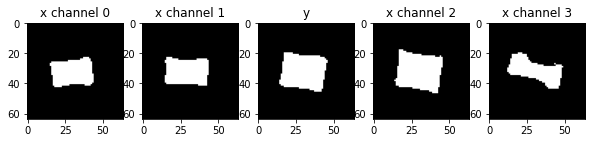

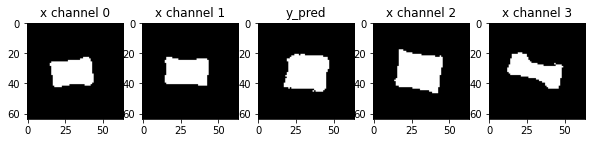

Loss: 0.04788147285580635


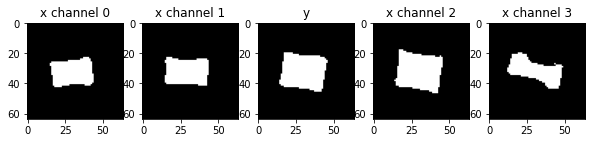

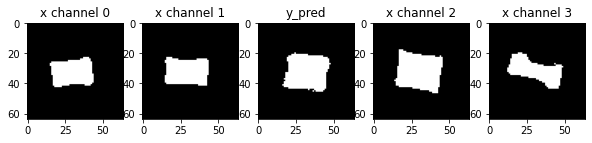

Loss: 0.047525886446237564


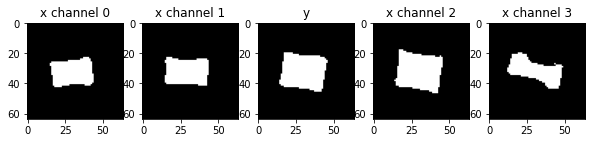

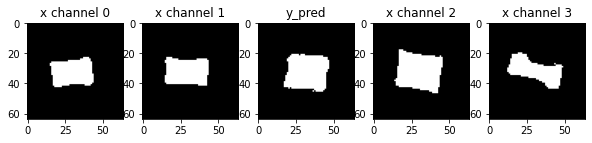

Loss: 0.04713898152112961


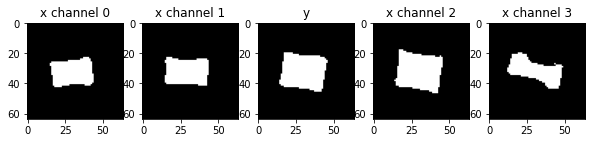

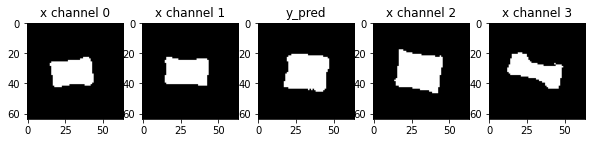

Loss: 0.04689190536737442


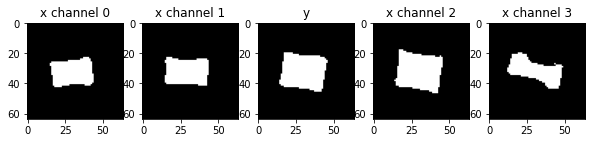

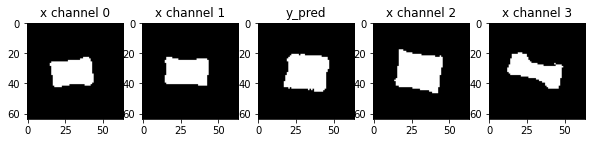

Loss: 0.04670862853527069


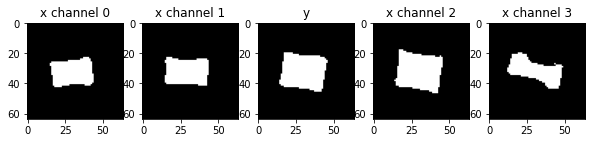

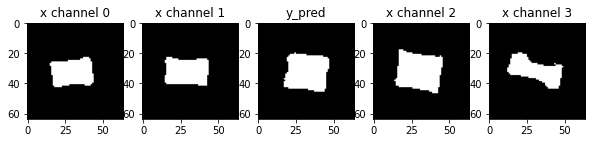

Loss: 0.04700033366680145


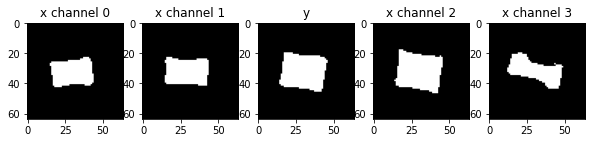

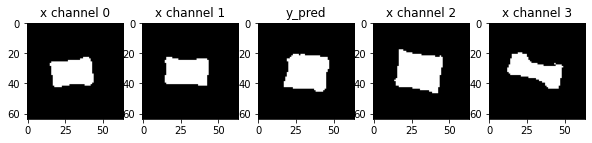

Loss: 0.04807782173156738


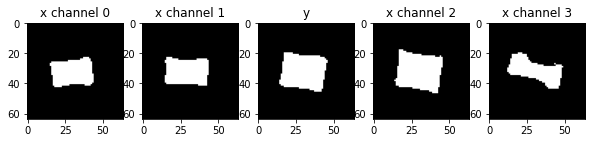

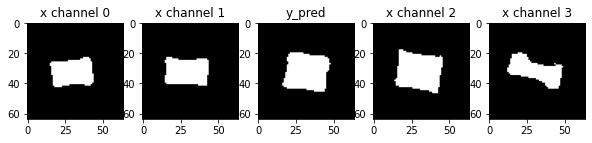

Loss: 0.05345878750085831


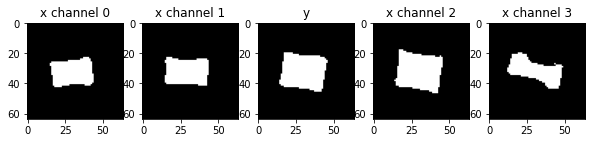

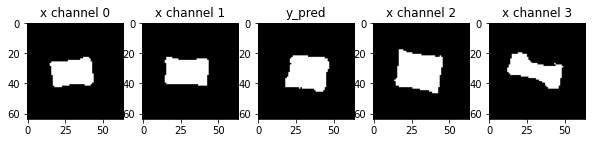

Loss: 0.046005114912986755


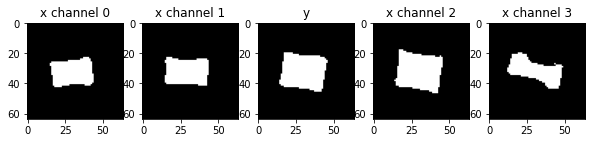

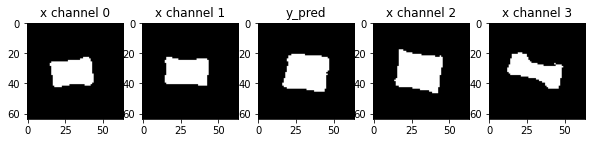

Loss: 0.05084238201379776


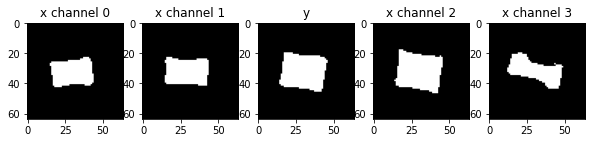

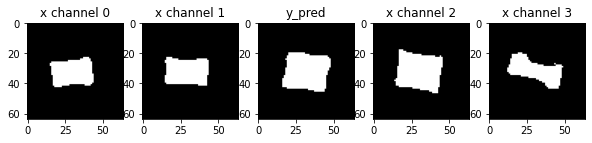

Loss: 0.0642455592751503


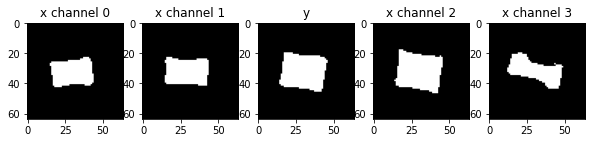

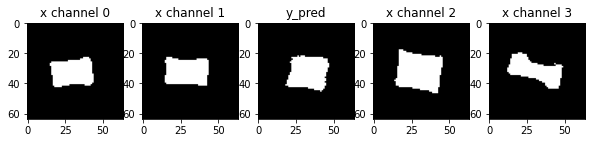

Loss: 0.0525524765253067


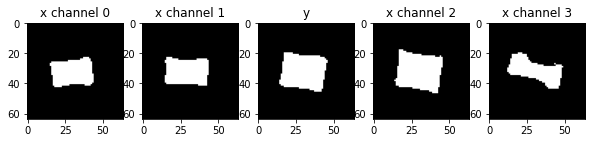

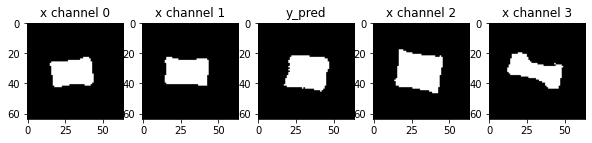

Loss: 0.06470661610364914


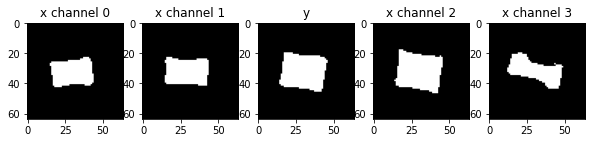

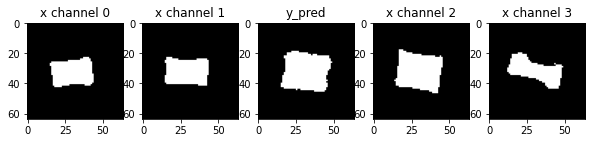

Loss: 0.05125366151332855


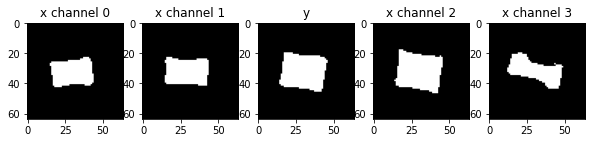

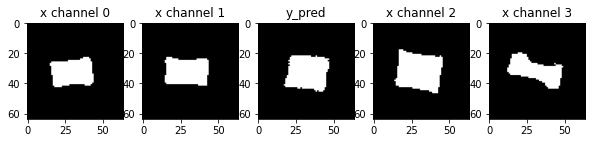

Loss: 0.06009810045361519


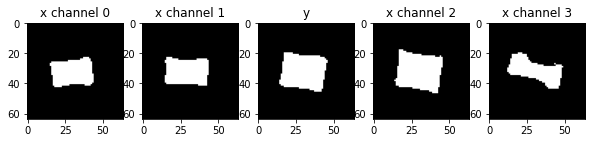

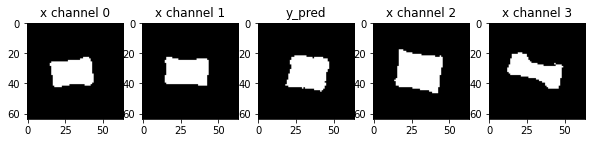

Loss: 0.049764491617679596


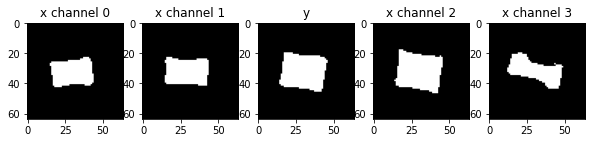

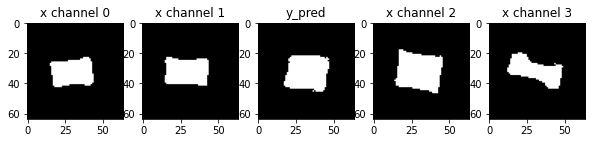

Loss: 0.053457051515579224


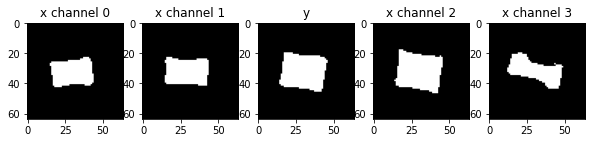

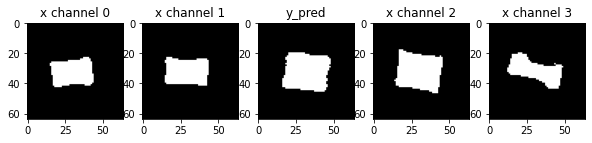

Loss: 0.05126401409506798


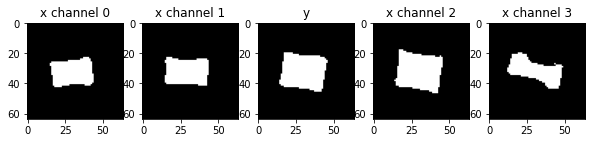

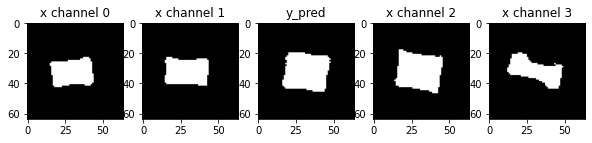

Loss: 0.04842706769704819


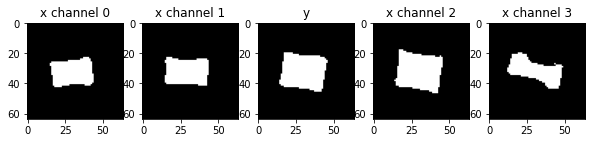

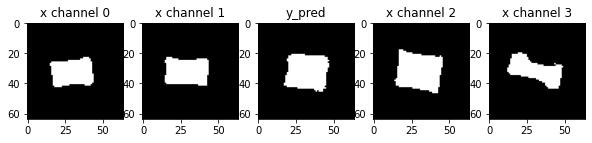

Loss: 0.052666500210762024


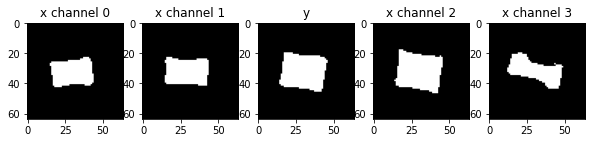

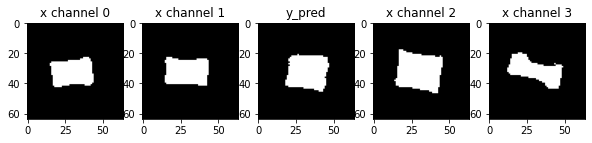

Loss: 0.04827830195426941


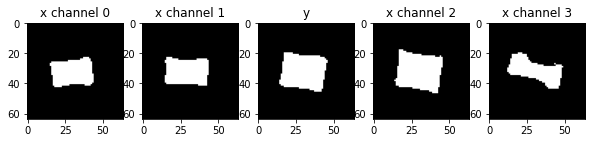

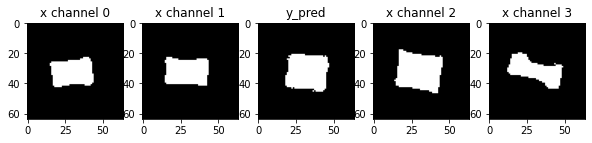

Loss: 0.047486938536167145


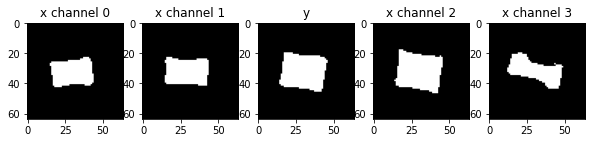

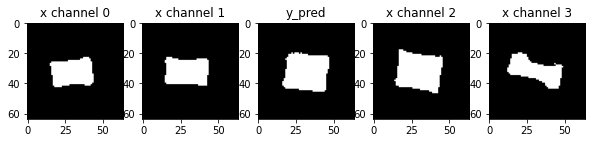

Loss: 0.049952492117881775


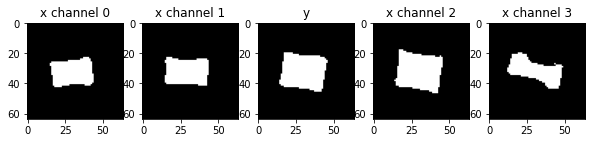

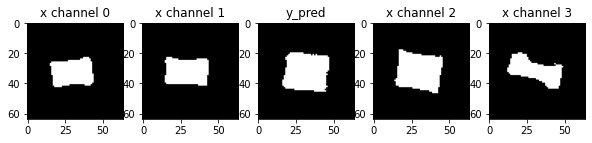

Loss: 0.04549400880932808


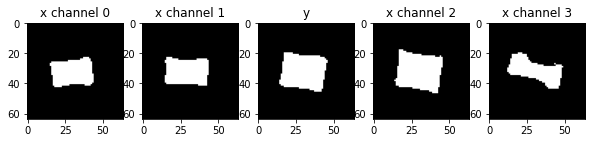

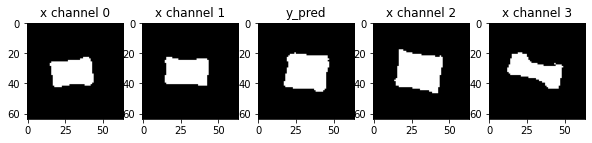

Loss: 0.048828642815351486


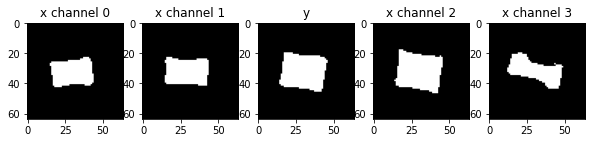

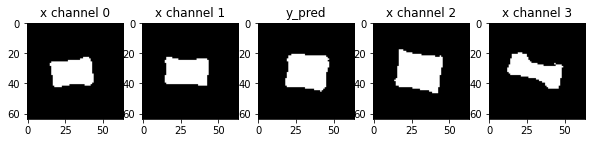

Loss: 0.046099044382572174


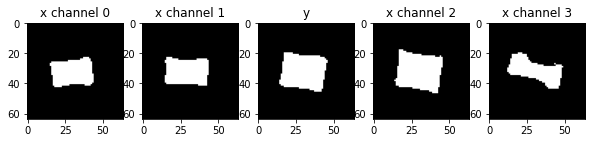

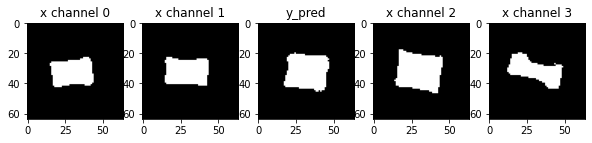

Loss: 0.04556325450539589


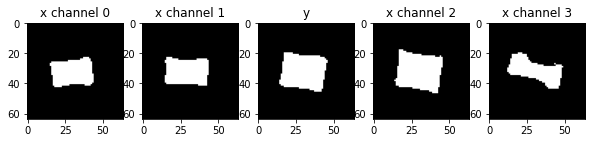

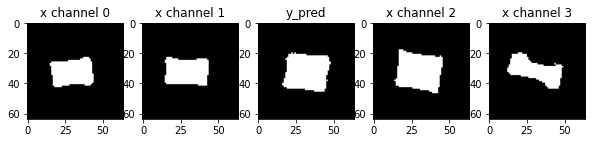

Loss: 0.046807777136564255


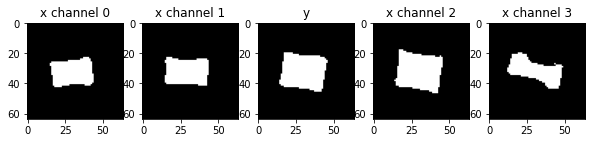

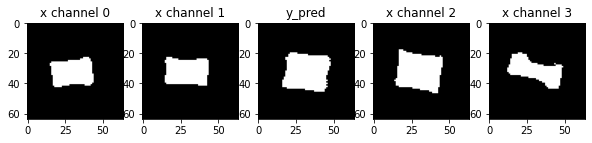

Loss: 0.04434199631214142


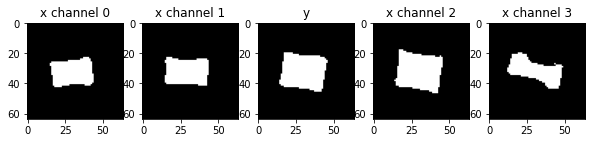

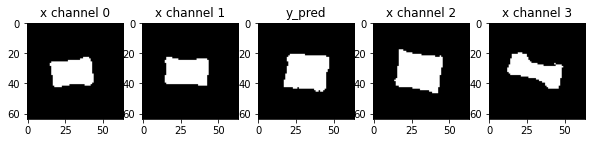

Loss: 0.04625338315963745


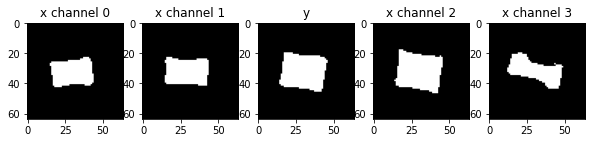

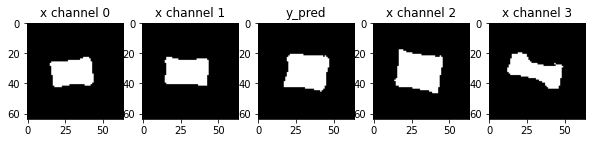

Loss: 0.04436887800693512


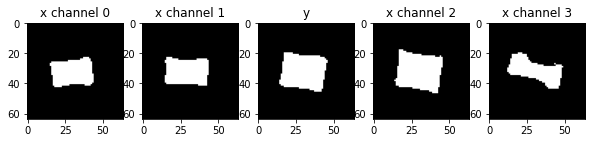

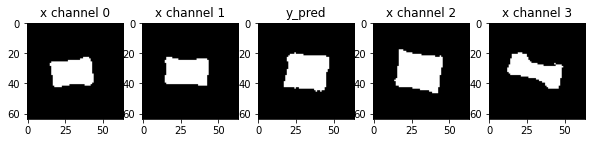

Loss: 0.04424310475587845


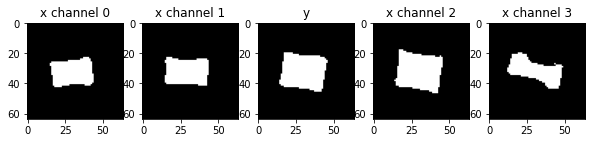

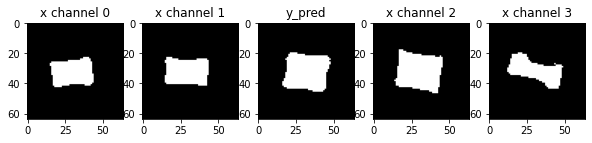

Loss: 0.044533684849739075


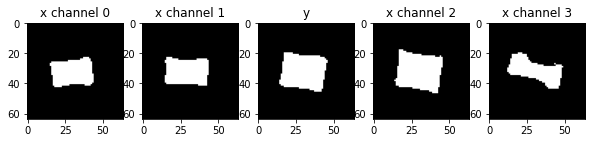

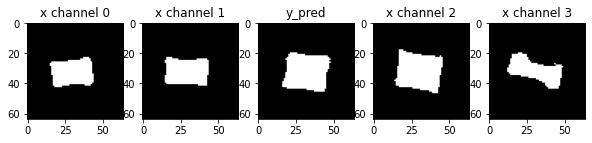

Loss: 0.04308825731277466


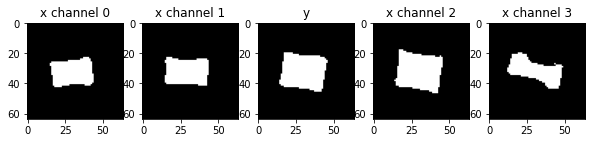

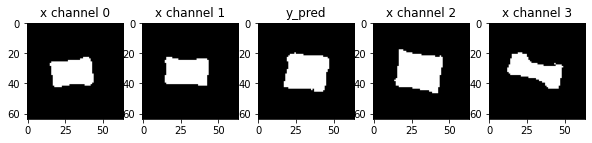

Loss: 0.044174790382385254


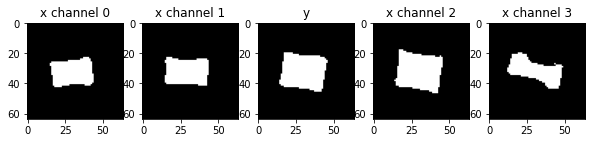

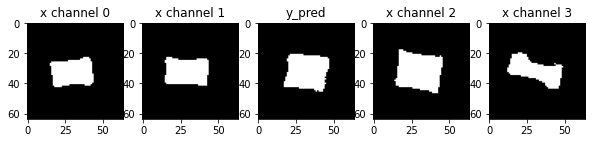

Loss: 0.042488545179367065


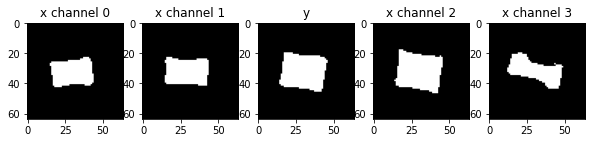

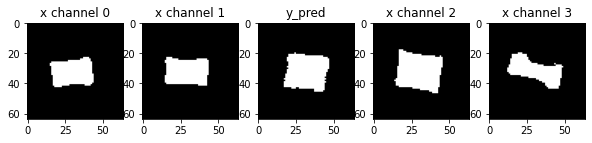

Loss: 0.043418705463409424


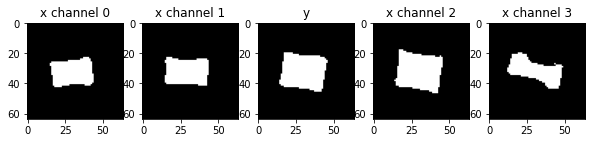

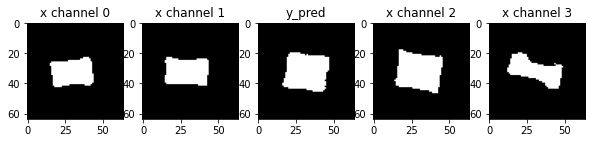

Loss: 0.04231207072734833


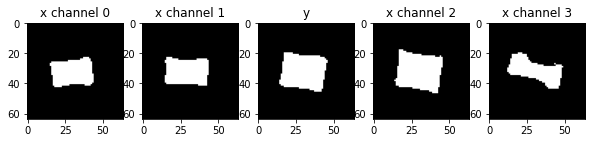

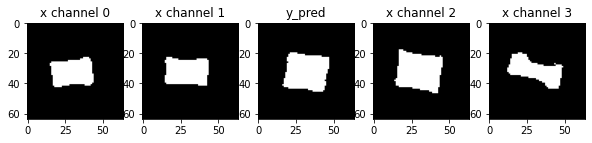

In [4]:
# define loss and optimizer
unet = UNet(in_channels=4).to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(unet.parameters(), lr=0.0003)

for epoch in range(200):
    for x, y in train_loader:      # x is 4 input channels with neighbours, y is healthy vert to be predicted
        optimizer.zero_grad()        
        y_pred = unet.forward(x.to(device))
        
        # compute loss & update
#         sigdiceloss = SigmoidDiceLoss()
#         loss = sigdiceloss.forward(torch.sigmoid(m_pred), m_true)
#         l1_loss = torch.nn.L1Loss()
#         loss = l1_loss(m_pred, m_true)

        loss = criterion(y_pred, y.to(device))
        loss.backward()
        optimizer.step()
        print('Loss: {}'.format(loss))   
        
        y_hard = y_pred.detach() > 0
        mid_slice = x.shape[-1] // 2 
    
        plt.figure(figsize=(10, 8))
        plt.subplot(151)
        plt.gca().set_title('x channel 0')
        plt.imshow(x[0, 0, mid_slice, :, :].cpu().detach(), cmap='gray')
        plt.subplot(152)
        plt.gca().set_title('x channel 1')
        plt.imshow(x[0, 1, mid_slice, :, :].cpu().detach(), cmap='gray')
        plt.subplot(153)        
        plt.imshow(y[0, 0, mid_slice, :, :].cpu().detach(), cmap='gray')
        plt.title('y')
        plt.subplot(154)  
        plt.gca().set_title('x channel 2')
        plt.imshow(x[0, 2, mid_slice, :, :].cpu().detach(), cmap='gray')
        plt.subplot(155)
        plt.gca().set_title('x channel 3')
        plt.imshow(x[0, 3, mid_slice, :, :].cpu().detach(), cmap='gray')
        plt.figure(figsize=(10, 8))
        plt.subplot(151)
        plt.gca().set_title('x channel 0')
        plt.imshow(x[0, 0, mid_slice, :, :].cpu().detach(), cmap='gray')
        plt.subplot(152)
        plt.gca().set_title('x channel 1')
        plt.imshow(x[0, 1, mid_slice, :, :].cpu().detach(), cmap='gray')
        plt.subplot(153)        
        plt.imshow(y_hard[0, 0, mid_slice, :, :].cpu().detach(), cmap='gray')
        plt.title('y_pred')
        plt.subplot(154)  
        plt.gca().set_title('x channel 2')
        plt.imshow(x[0, 2, mid_slice, :, :].cpu().detach(), cmap='gray')
        plt.subplot(155)
        plt.gca().set_title('x channel 3')
        plt.imshow(x[0, 3, mid_slice, :, :].cpu().detach(), cmap='gray')
        plt.show()

In [ ]:
len(train_loader)